In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with zipfile.ZipFile('/content/scab.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
path_to_data = '/content/data'

In [ ]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk(path_to_data):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [ ]:
# datasets with anomalies loading
list_of_df = [pd.read_csv(file,
                          sep=';',
                          index_col='datetime',
                          parse_dates=True) for file in all_files if 'anomaly-free' not in file]
# anomaly-free df loading
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0],
                            sep=';',
                            index_col='datetime',
                            parse_dates=True)

In [ ]:
# dataset characteristics printing
print('SKAB v0.9')
print(f'- A number of datasets: {len(list_of_df)}')
print(f'- Shape of the random dataset: {list_of_df[10].shape}')
n_cp = sum([len(df[df.changepoint==1.]) for df in list_of_df])
n_outlier = sum([len(df[df.anomaly==1.]) for df in list_of_df])
print(f'- A number of changepoints: {n_cp}')
print(f'- A number of outliers (point anomalies): {n_outlier}\n')
print(f'Head of the random dataset:')
display(list_of_df[3].head(5))

SKAB v0.9
- A number of datasets: 34
- Shape of the random dataset: (1141, 10)
- A number of changepoints: 129
- A number of outliers (point anomalies): 13067

Head of the random dataset:


Accelerometer1RMS  Accelerometer2RMS   Current  Pressure  \
datetime                                                                        
2020-03-09 16:56:31           0.027495           0.039593  0.939237  0.054711   
2020-03-09 16:56:32           0.027394           0.040137  1.235540  0.054711   
2020-03-09 16:56:33           0.027292           0.040152  1.331430  0.054711   
2020-03-09 16:56:34           0.027325           0.038464  1.256480 -0.273216   
2020-03-09 16:56:35           0.027303           0.036969  1.355950  0.054711   

                     Temperature  Thermocouple  Voltage  Volume Flow RateRMS  \
datetime                                                                       
2020-03-09 16:56:31      69.1741       24.1655  238.008              32.0000   
2020-03-09 16:56:32      69.0063       24.1664  229.409              32.0000   
2020-03-09 16:56:33      69.0291       24.1567  241.450              32.0000   
2020-03-09 16:56:34      68.9928       24.1582  250.288              32.0431   
2020-03-09 16:56:35      68.9590       24.1562  240.265              32.9581   

                     anomaly  changepoint  
datetime                                   
2020-03-09 16:56:31      0.0          0.0  
2020-03-09 16:56:32      0.0          0.0  
2020-03-09 16:56:33      0.0          0.0  
2020-03-09 16:56:34      0.0          0.0  
2020-03-09 16:56:35      0.0          0.0

In [ ]:
anomaly_free_df.describe()

Accelerometer1RMS  Accelerometer2RMS      Current     Pressure  \
count        9405.000000        9405.000000  9405.000000  9405.000000   
mean            0.212604           0.268407     2.403010     0.111266   
std             0.004740           0.003989     0.486469     0.253332   
min             0.188217           0.248062     0.855284    -1.257000   
25%             0.210723           0.265510     2.129560     0.054711   
50%             0.213092           0.267368     2.541890     0.054711   
75%             0.215540           0.271630     2.728770     0.382638   
max             0.227198           0.279921     3.241530     1.366420   

       Temperature  Thermocouple      Voltage  Volume Flow RateRMS  
count  9405.000000   9405.000000  9405.000000          9405.000000  
mean     89.472308     28.474310   228.647173           125.237471  
std       0.667109      0.730734    10.980578             1.605327  
min      88.171300     26.850800   201.365000           118.000000  
25%      88.954100     27.916700   222.623000           124.000000  
50%      89.351500     28.640400   228.932000           125.677000  
75%      89.861700     29.113700   234.926000           126.328000  
max      91.724900     29.522100   252.806000           128.353000

In [ ]:
anomaly_free_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9405 entries, 2020-02-08 13:30:47 to 2020-02-08 16:16:47
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Accelerometer1RMS    9405 non-null   float64
 1   Accelerometer2RMS    9405 non-null   float64
 2   Current              9405 non-null   float64
 3   Pressure             9405 non-null   float64
 4   Temperature          9405 non-null   float64
 5   Thermocouple         9405 non-null   float64
 6   Voltage              9405 non-null   float64
 7   Volume Flow RateRMS  9405 non-null   float64
dtypes: float64(8)
memory usage: 661.3 KB


Data visualization of the anomaly free dataset features.

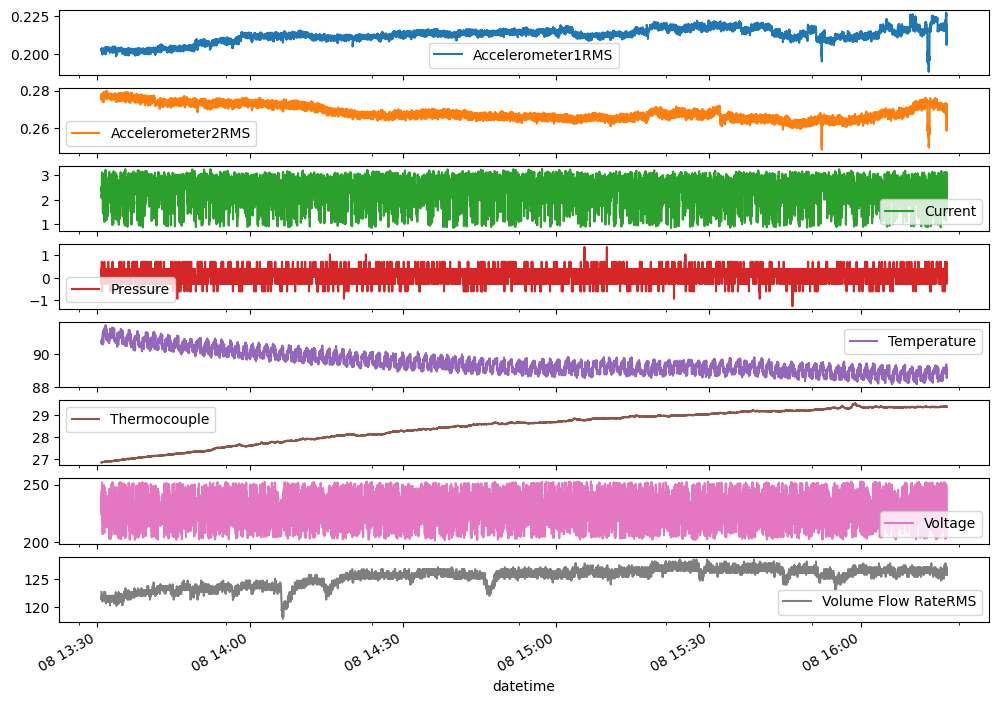

In [ ]:
anomaly_free_df.plot(subplots = True, figsize = (12, 9))
plt.show()

Data visualization of the random dataset with anomalies features.

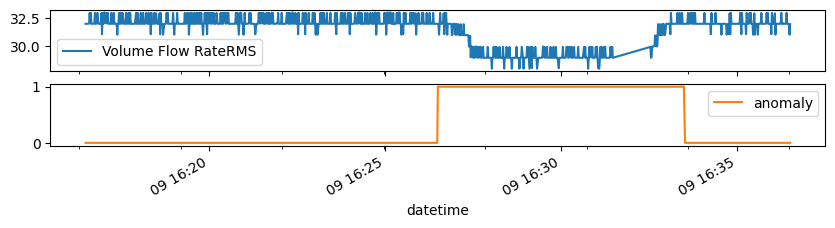

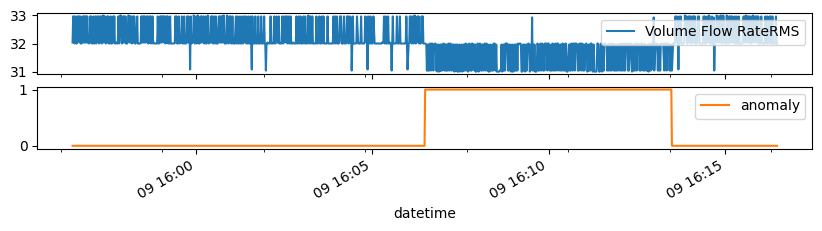

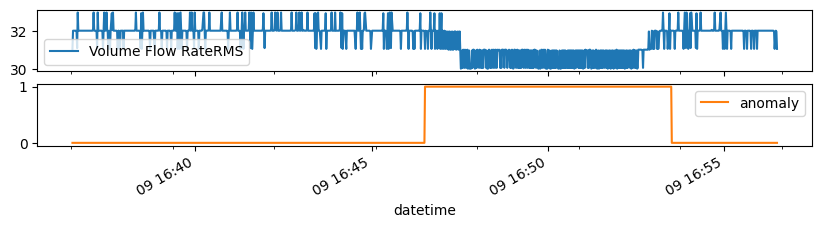

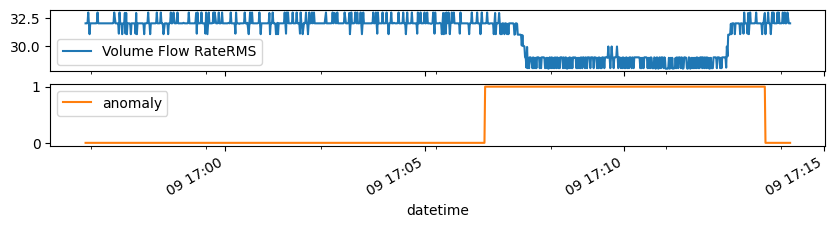

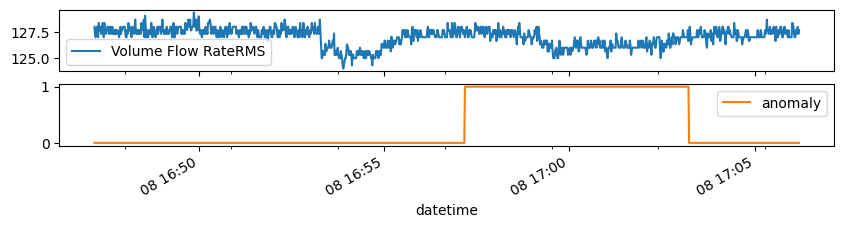

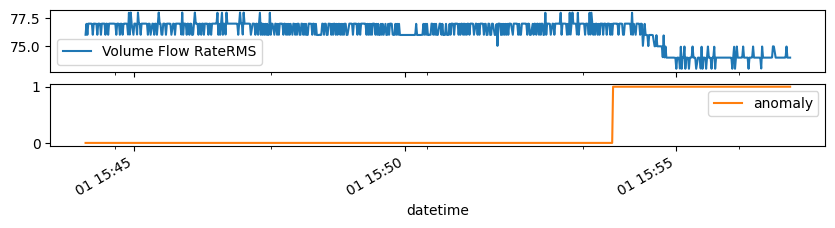

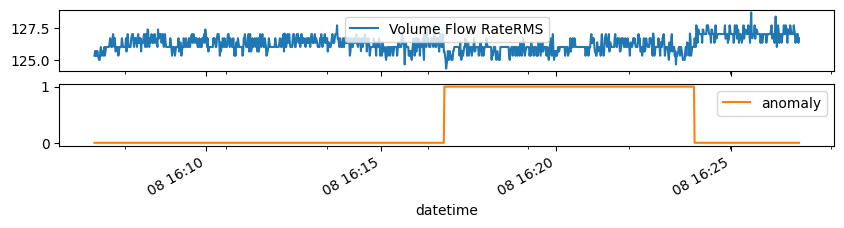

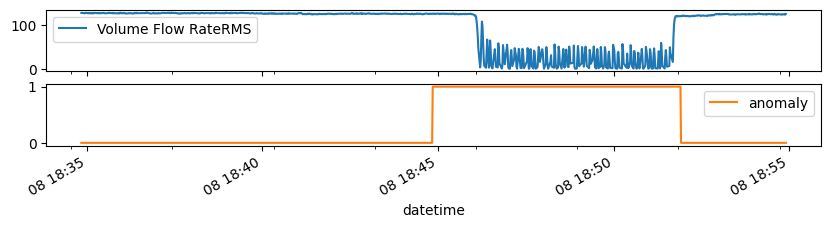

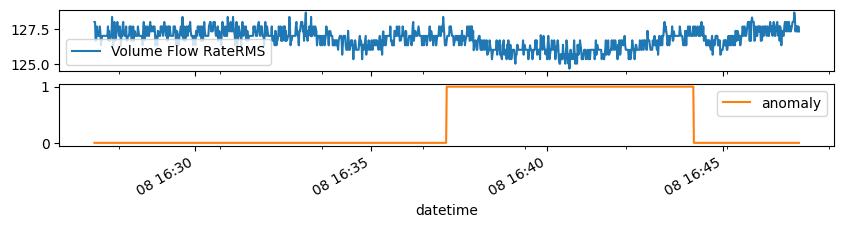

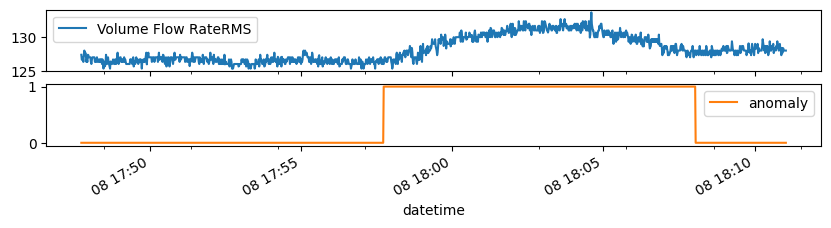

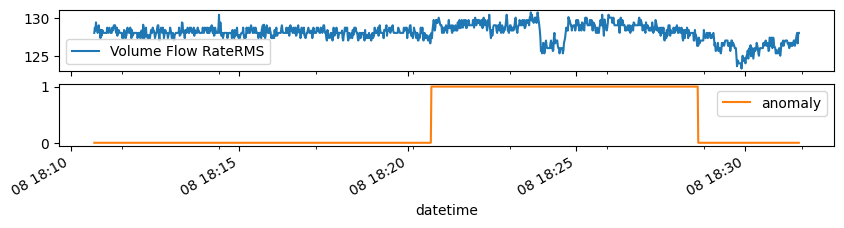

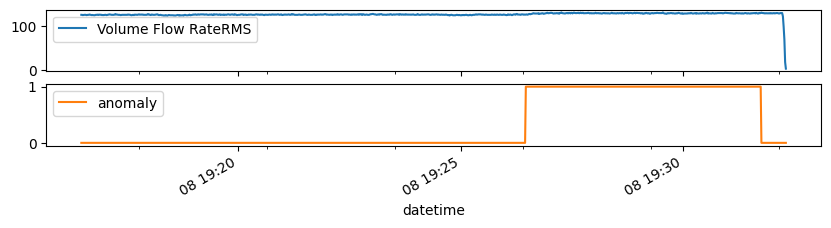

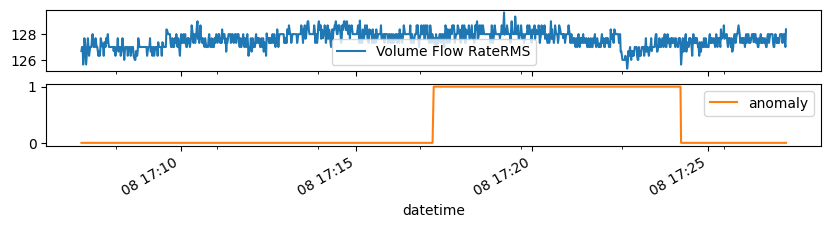

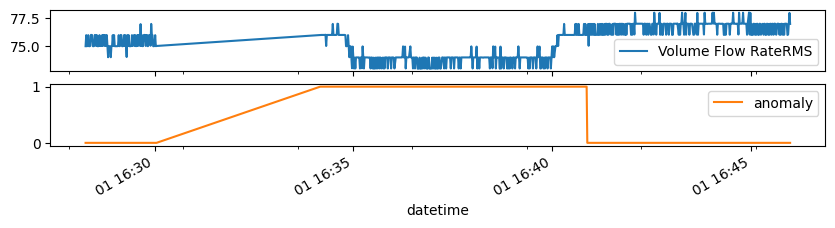

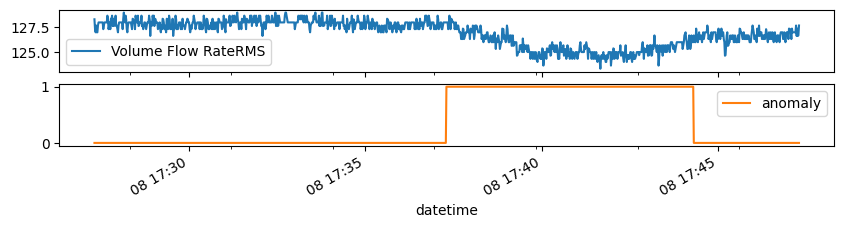

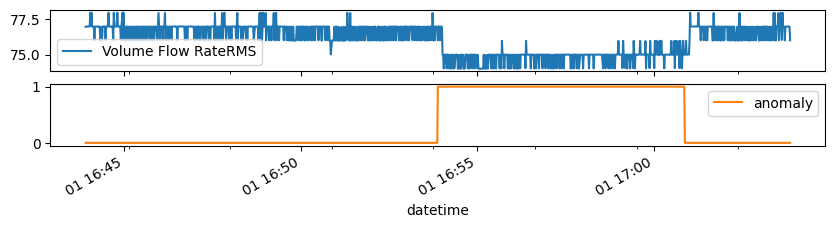

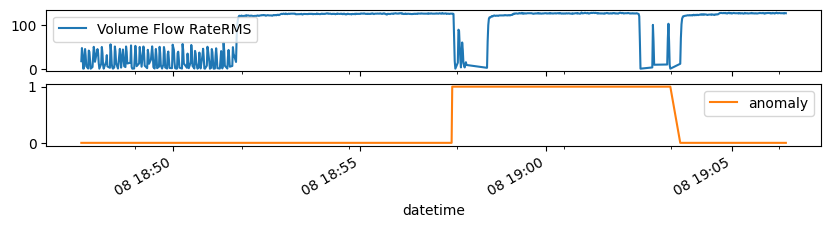

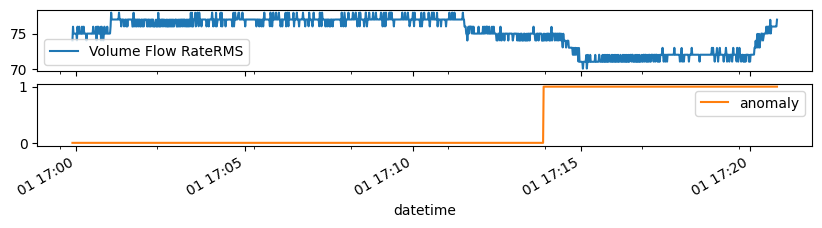

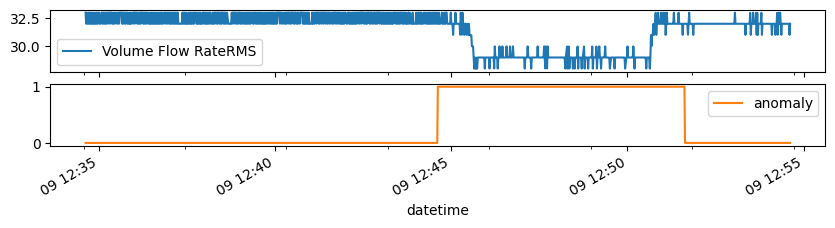

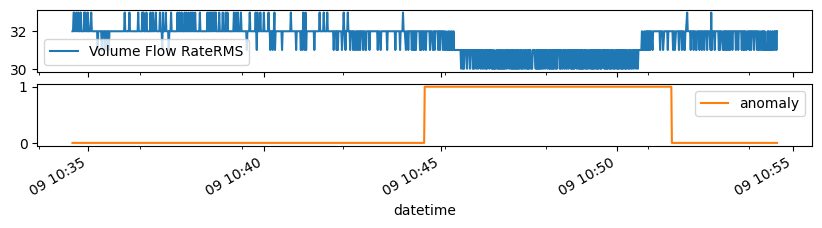

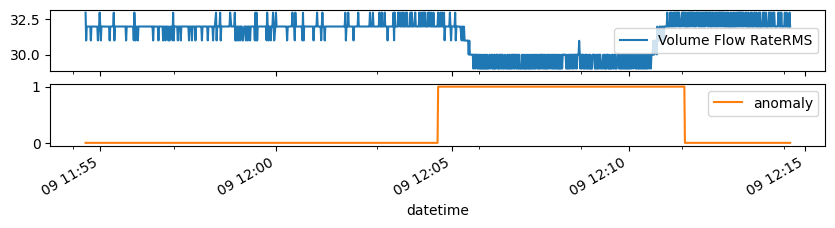

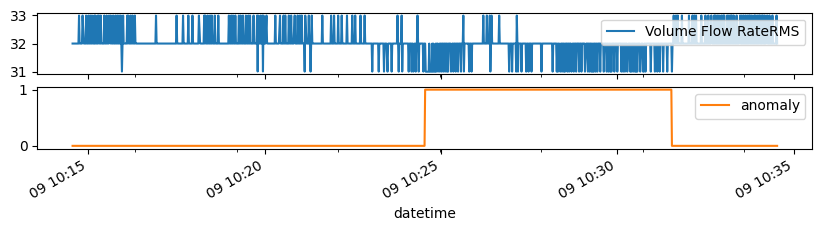

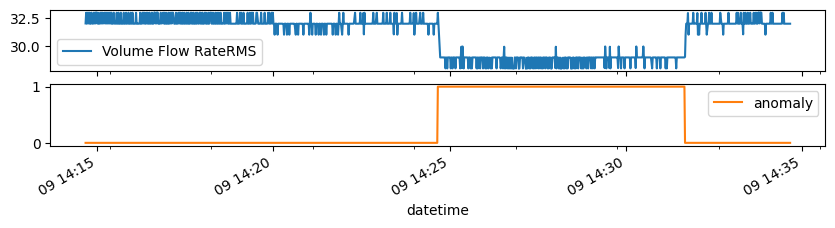

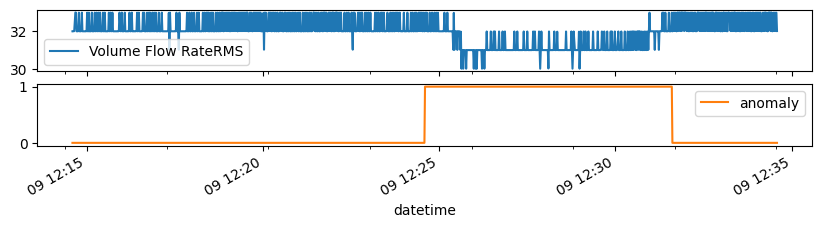

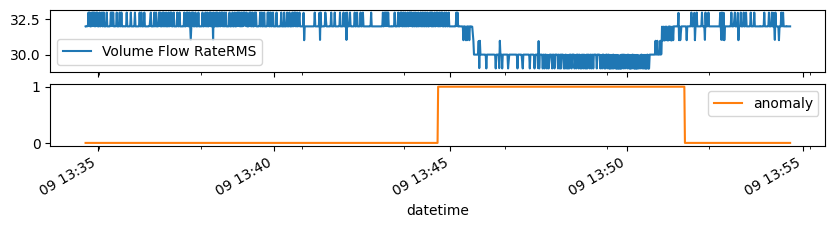

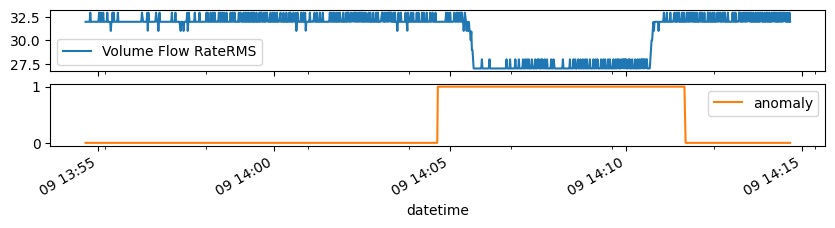

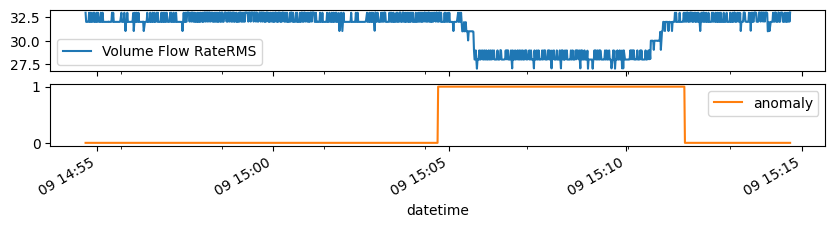

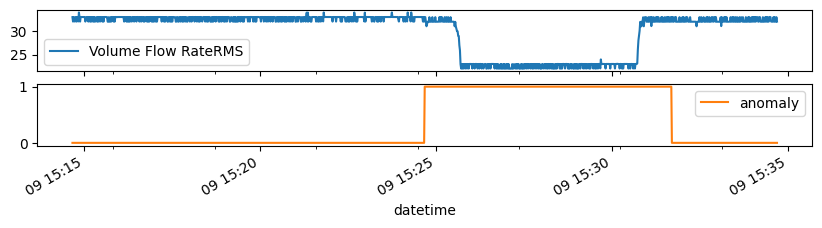

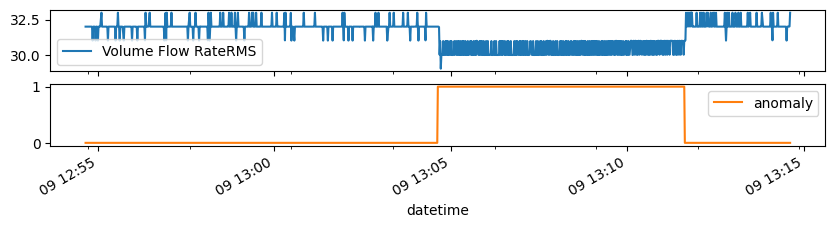

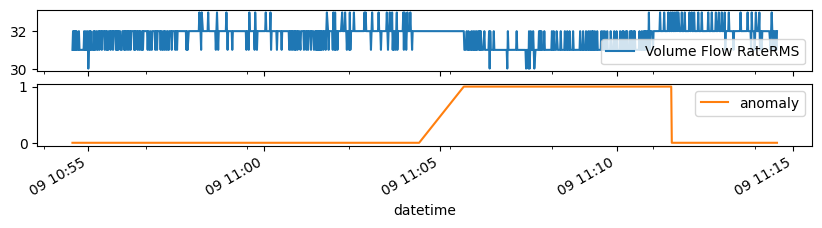

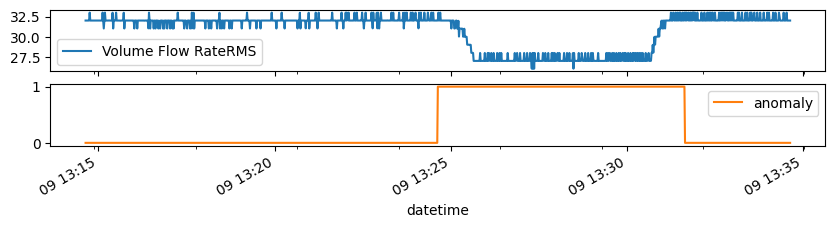

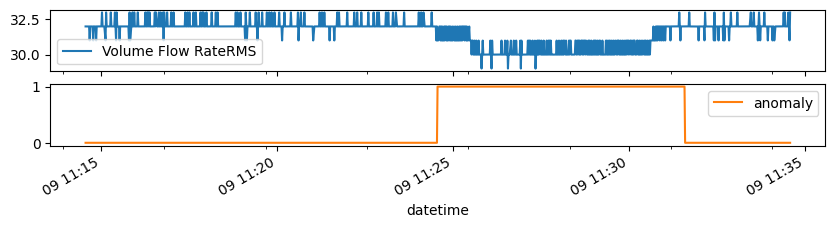

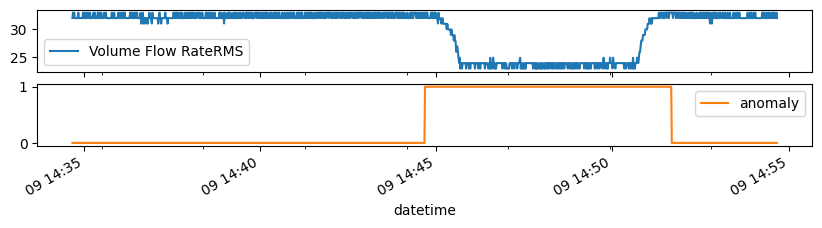

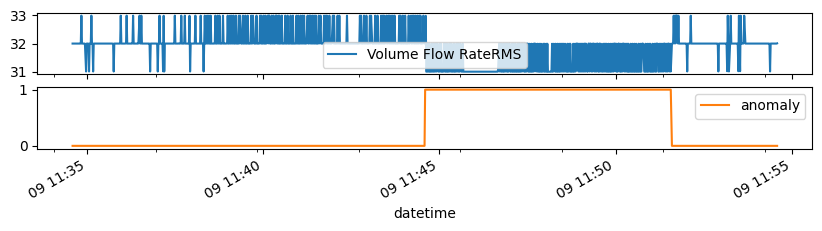

In [ ]:
for df in list_of_df:
  df[['Volume Flow RateRMS', 'anomaly']].plot(subplots = True, figsize = (10, 2))
  plt.show()

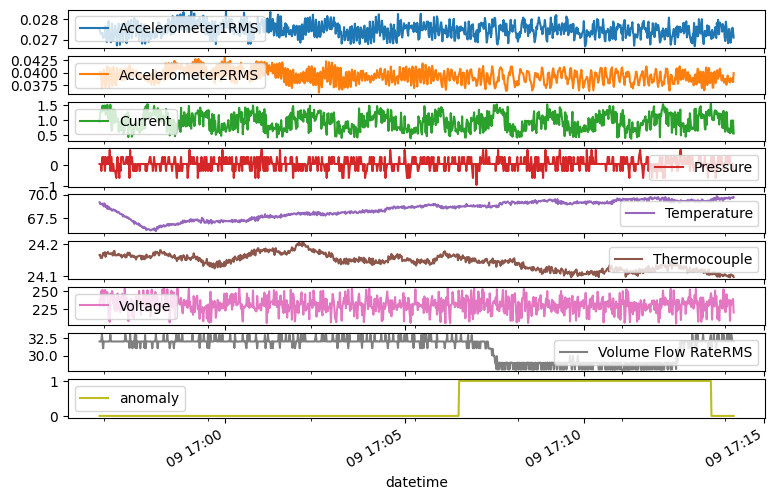

In [ ]:
list_of_df[3].drop('changepoint', axis=1).plot(subplots = True, figsize = (9, 6))
plt.show()

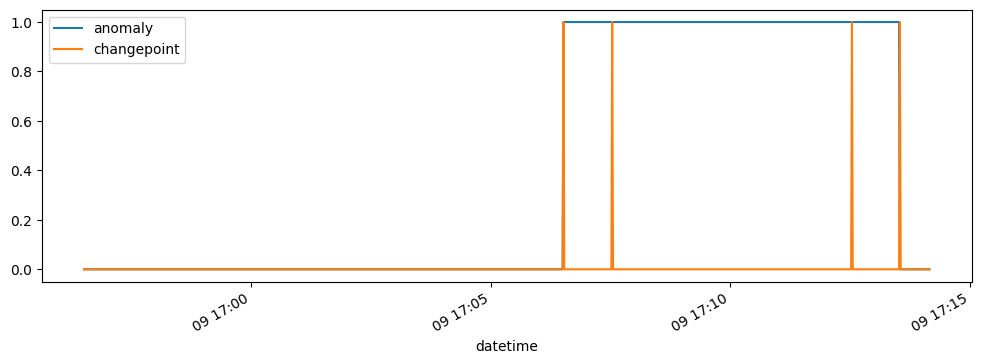

In [ ]:
# plotting the labels both for outlier and changepoint detection problems
list_of_df[3].anomaly.plot(figsize=(12, 4))
list_of_df[3].changepoint.plot()
plt.legend()
plt.show()

<Axes: xlabel='datetime'>

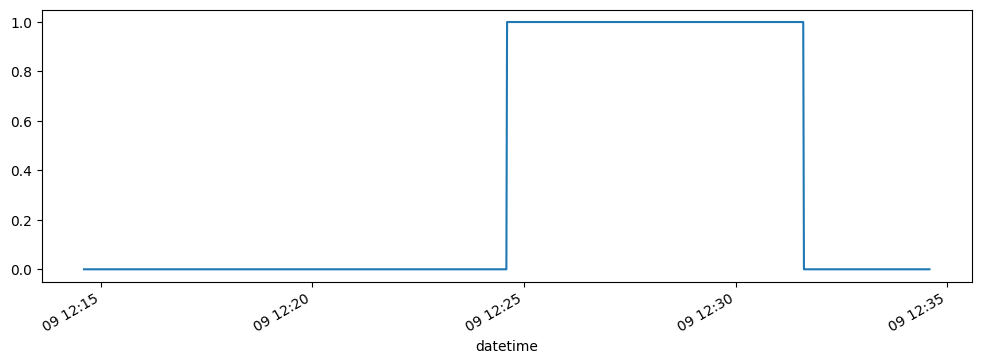

In [ ]:
list_of_df[4].anomaly.plot(figsize=(12, 4))

The matrix of scatter pairplots of the random dataset.

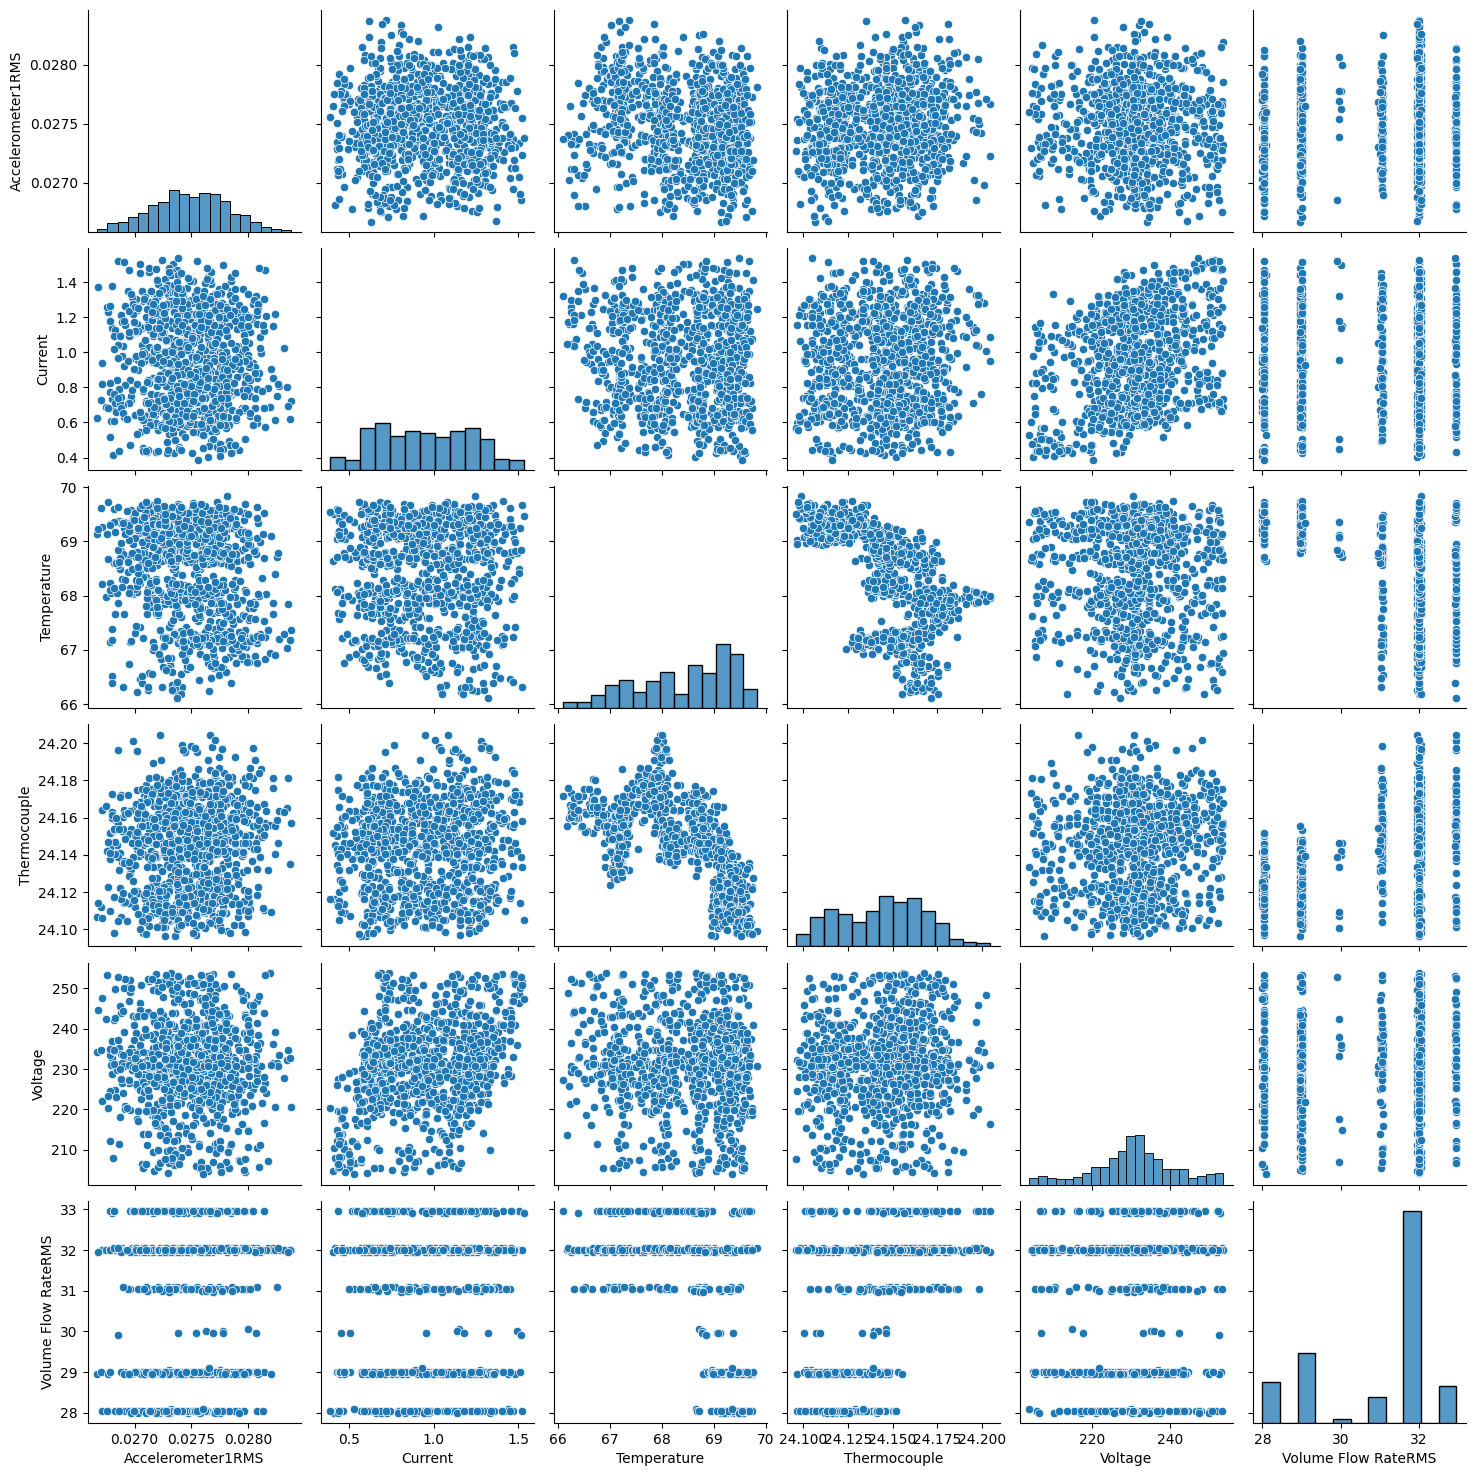

In [ ]:
features = ['Accelerometer1RMS', 'Current', 'Temperature', 'Thermocouple', 'Voltage', 'Volume Flow RateRMS']
sns.pairplot(list_of_df[3].reset_index()[features]);

The correlation of signals in individual datasets differs greatly from each other.


<ipython-input-35-74ae28dc41a4>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,9))


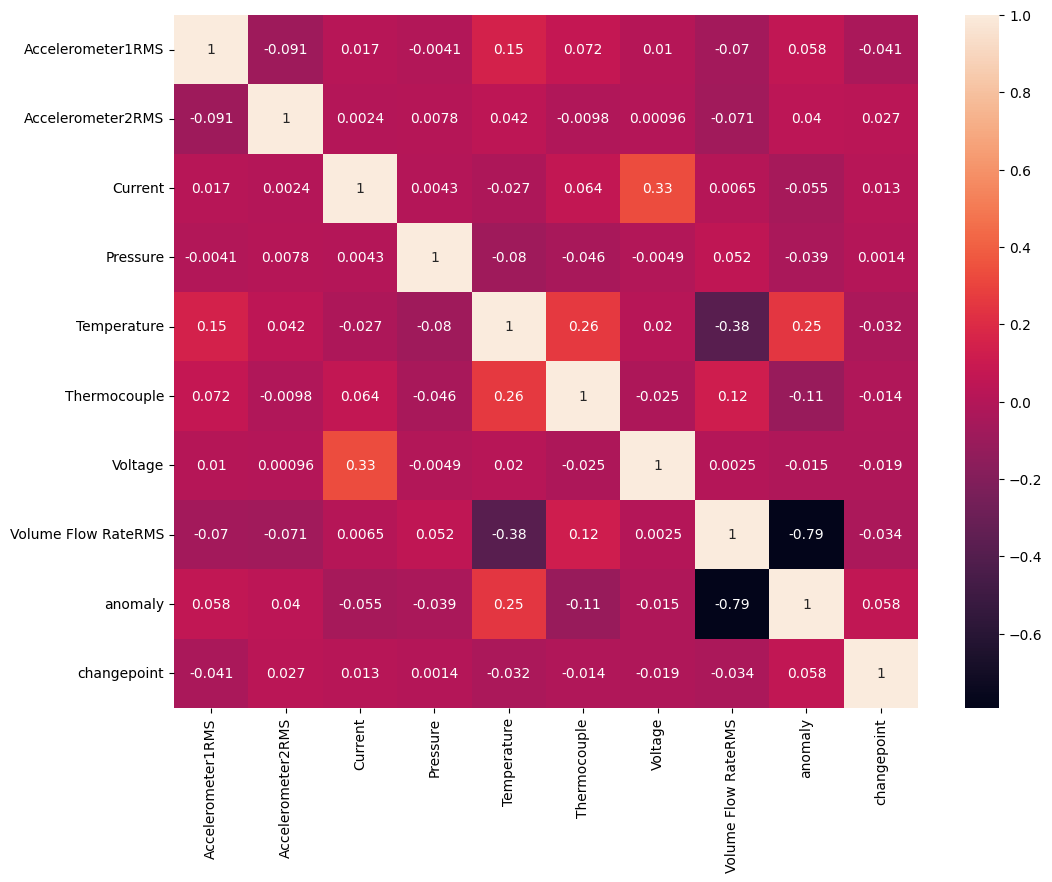

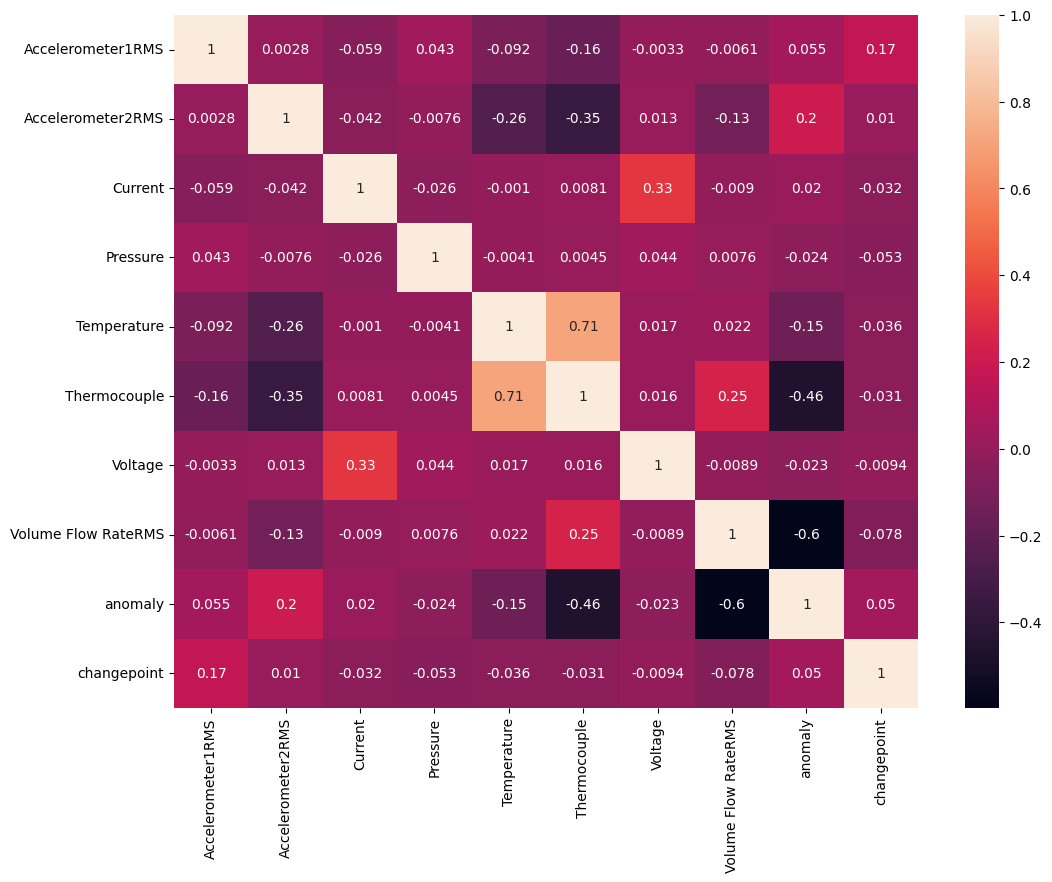

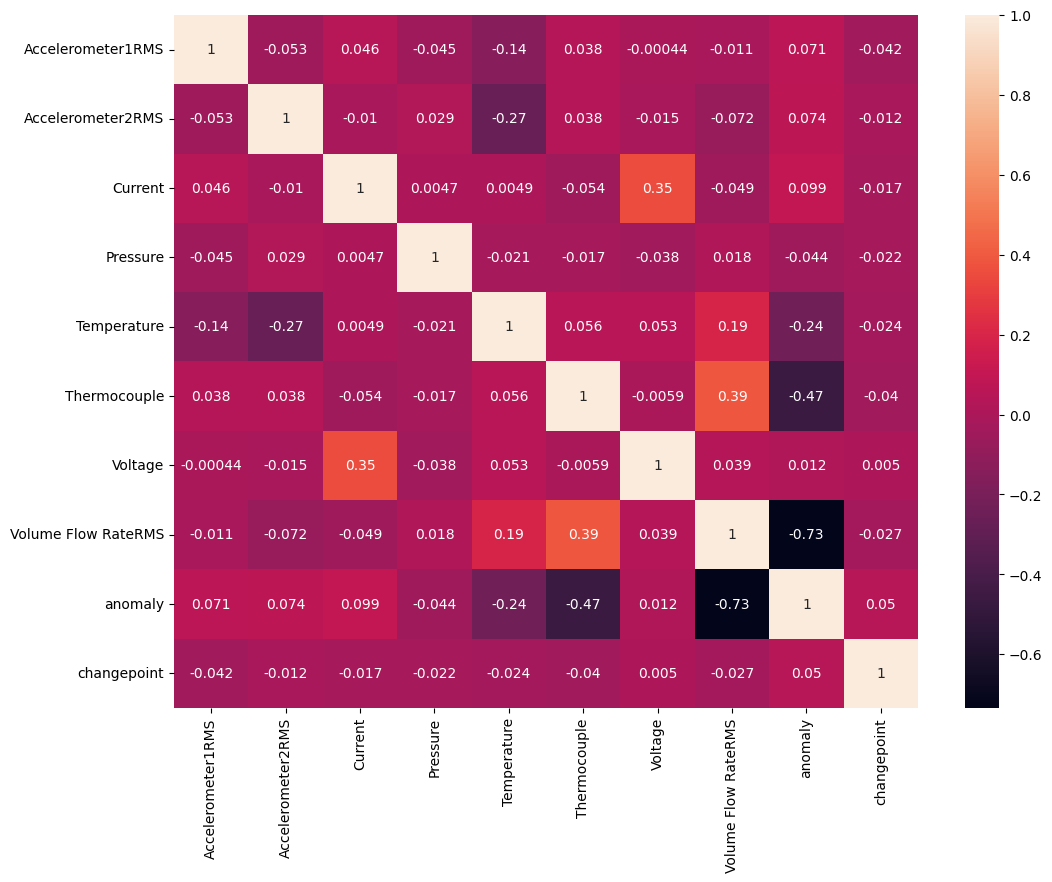

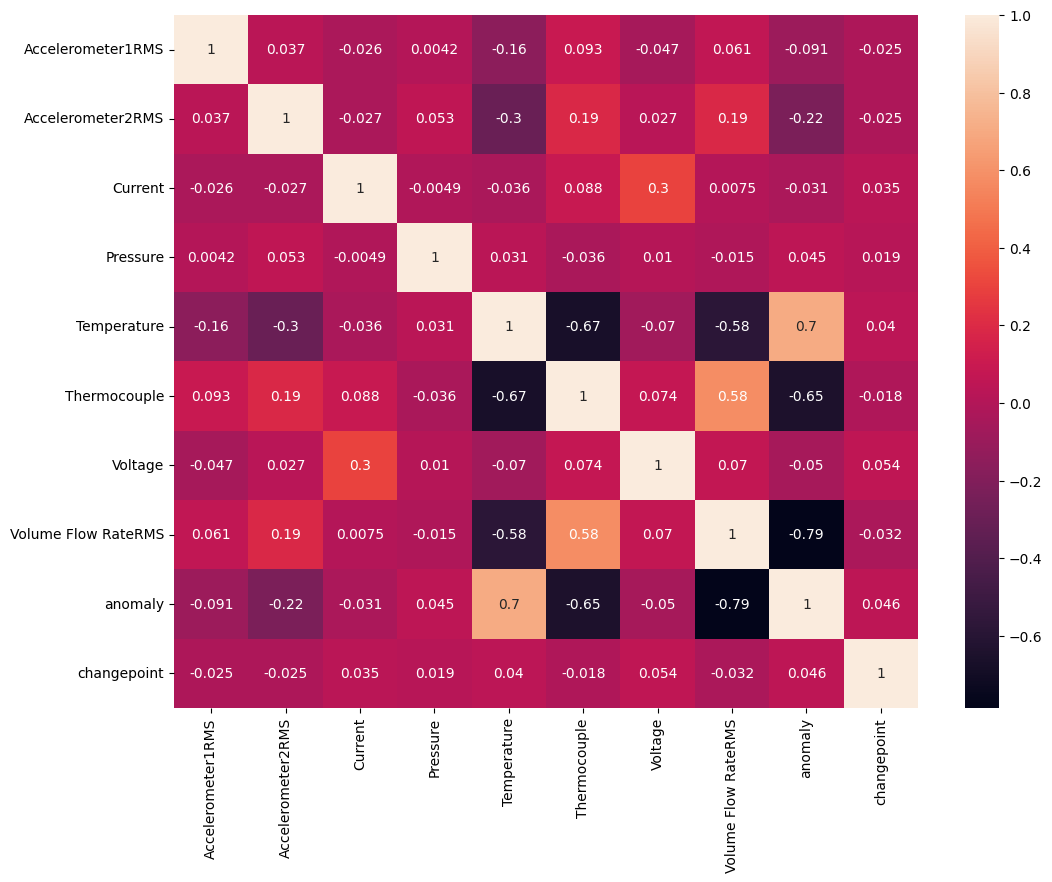

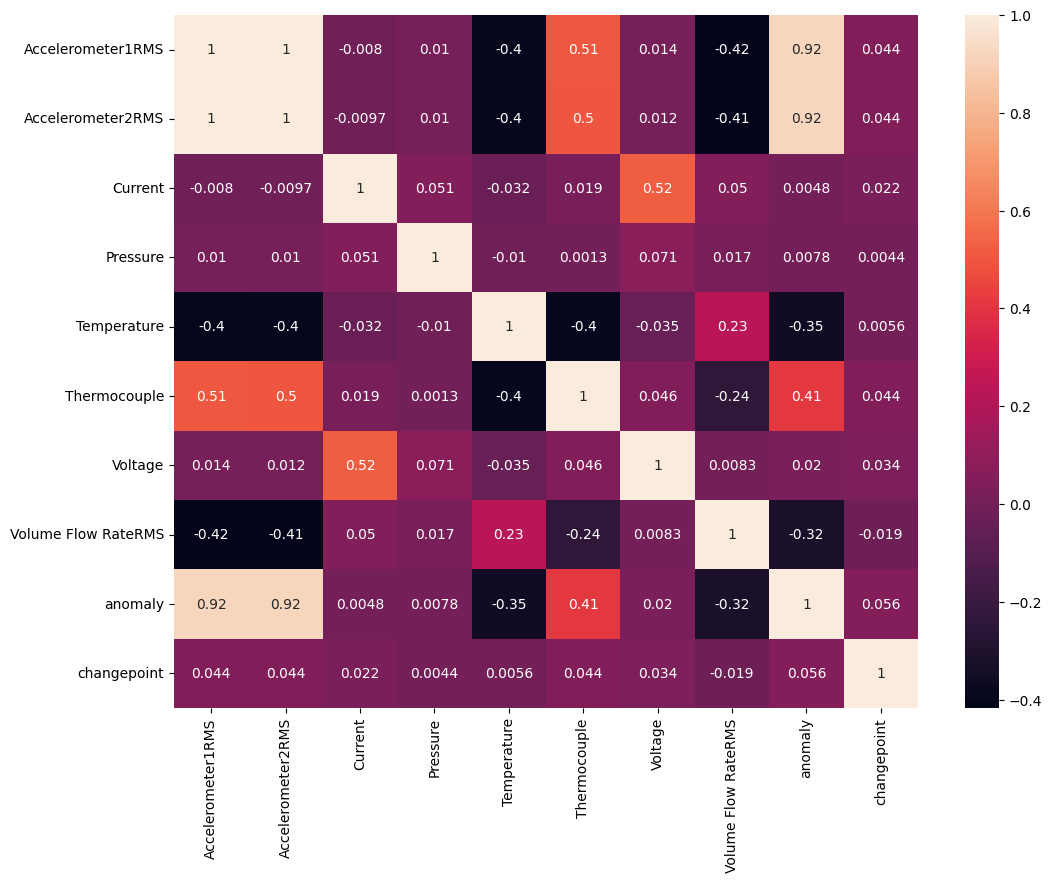

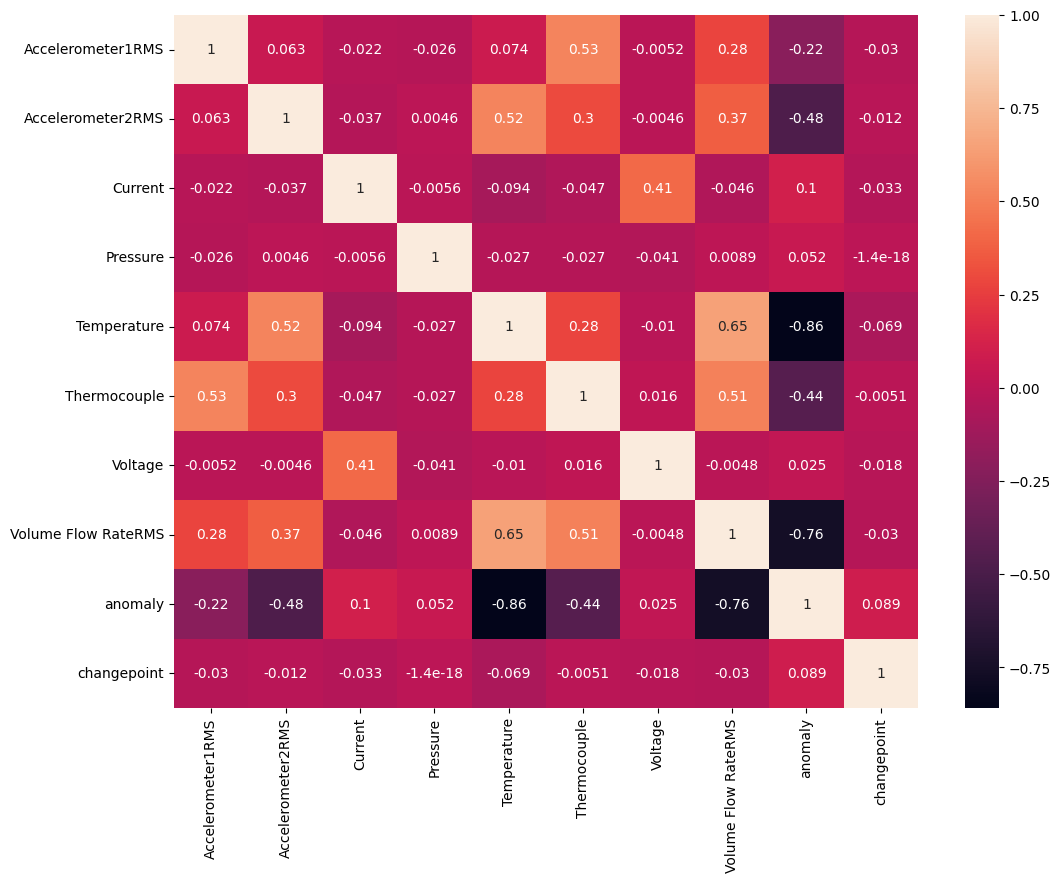

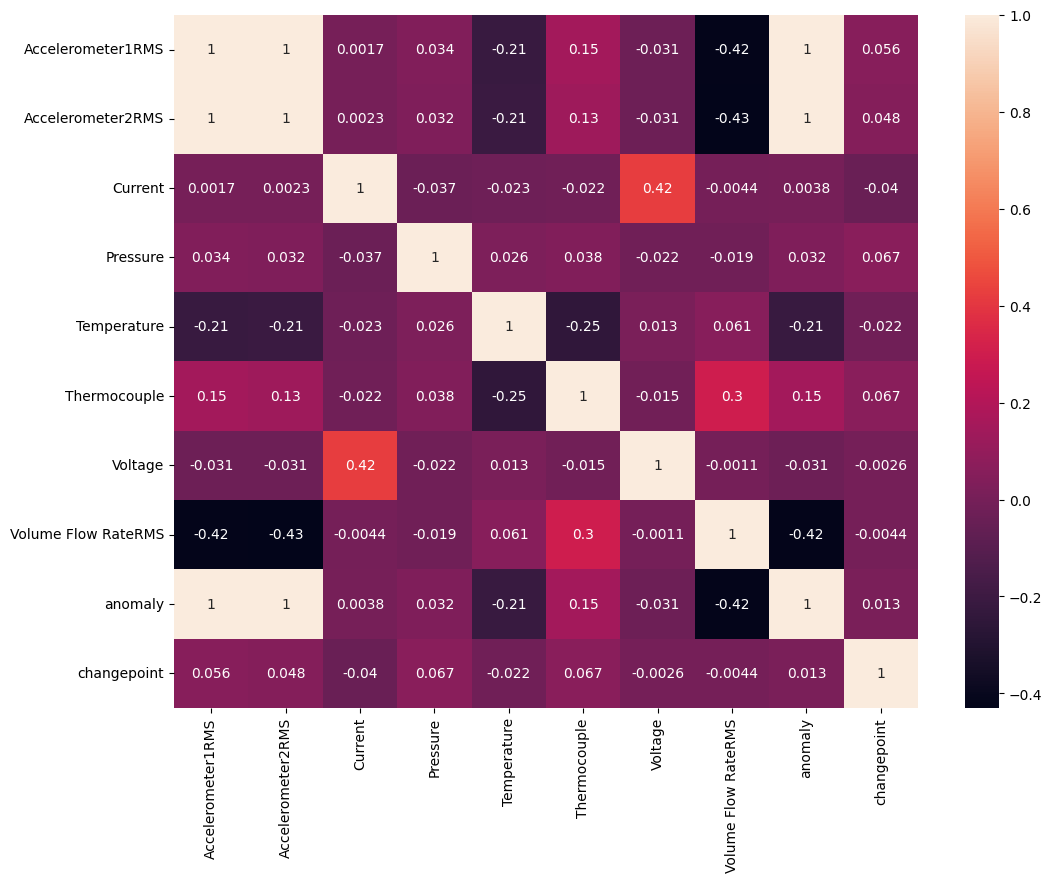

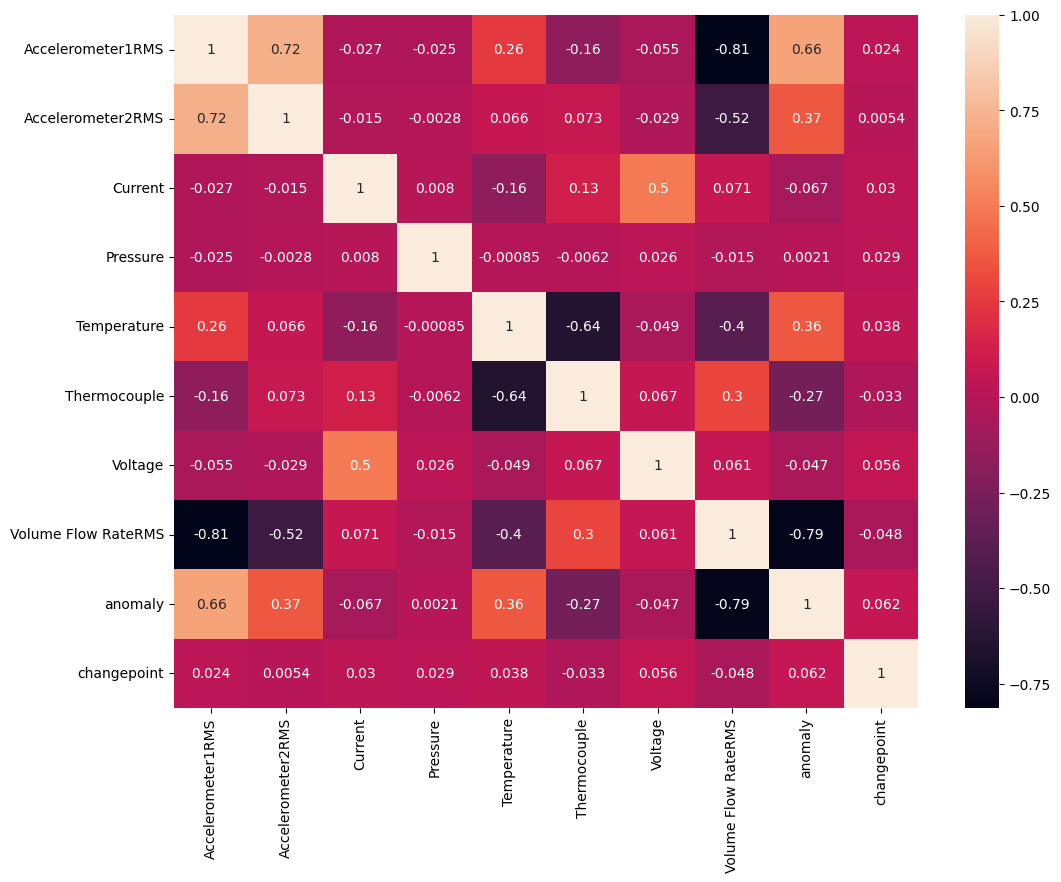

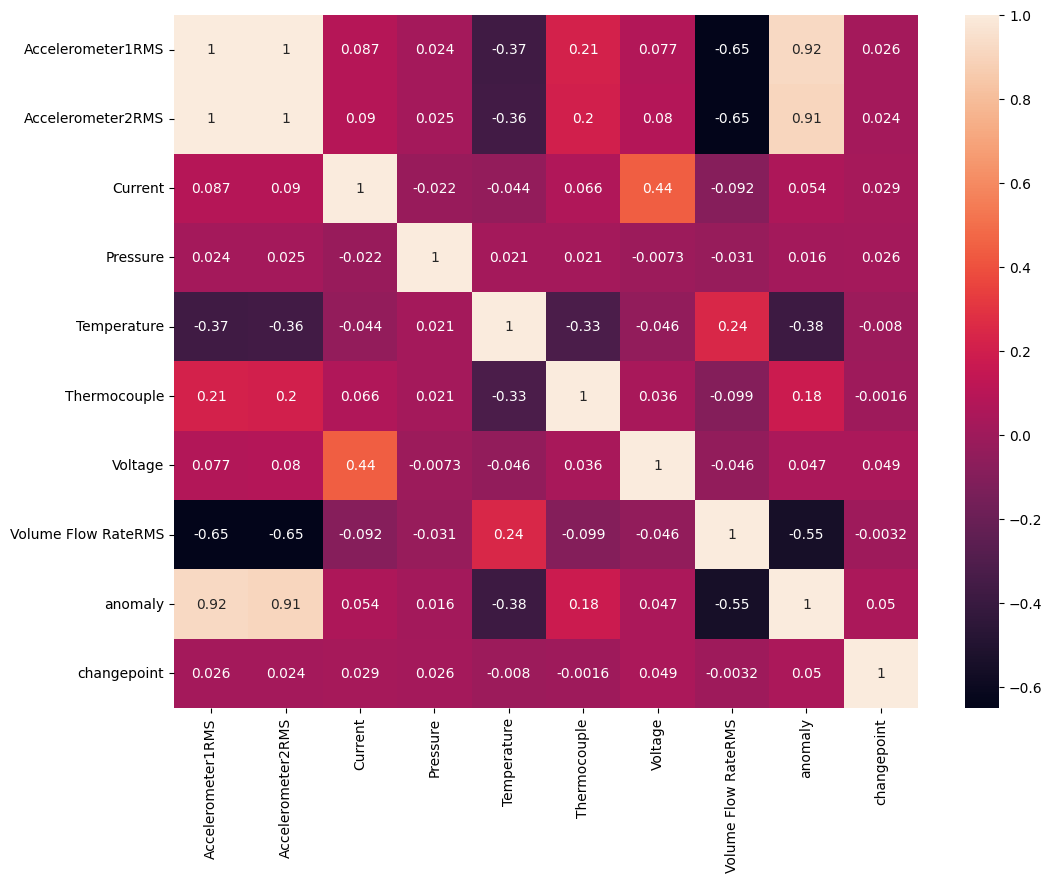

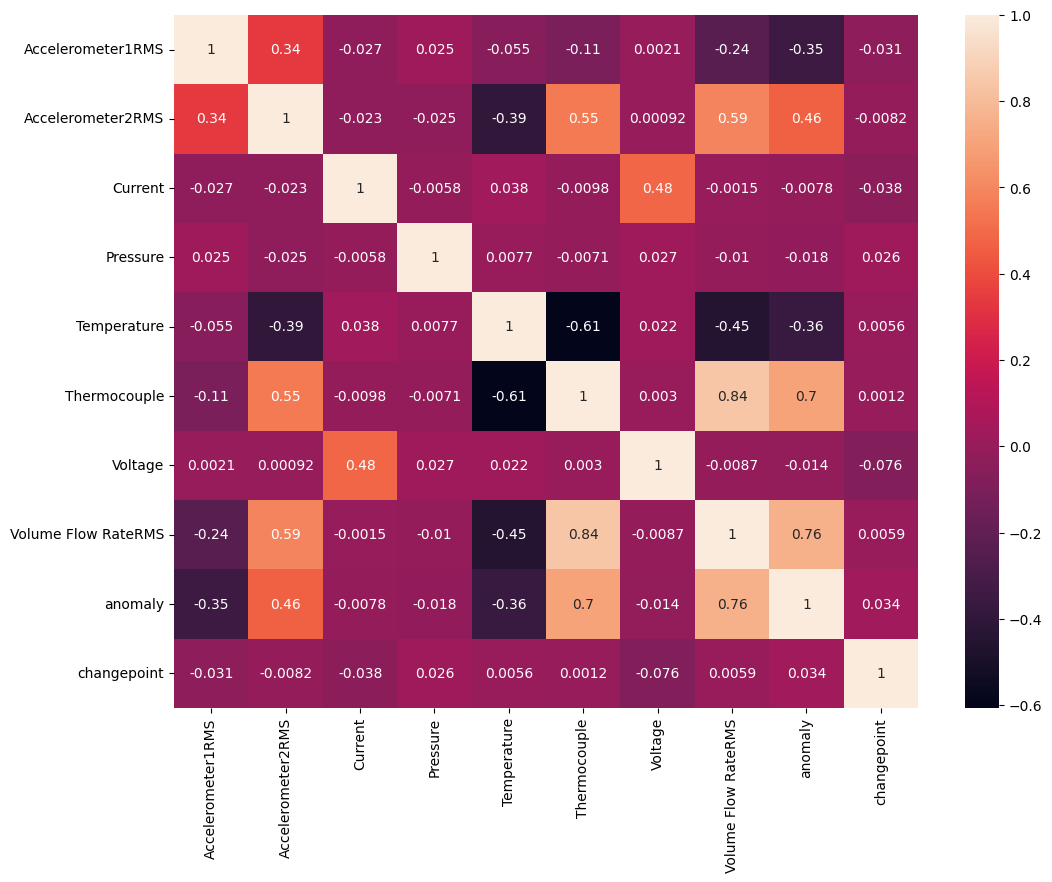

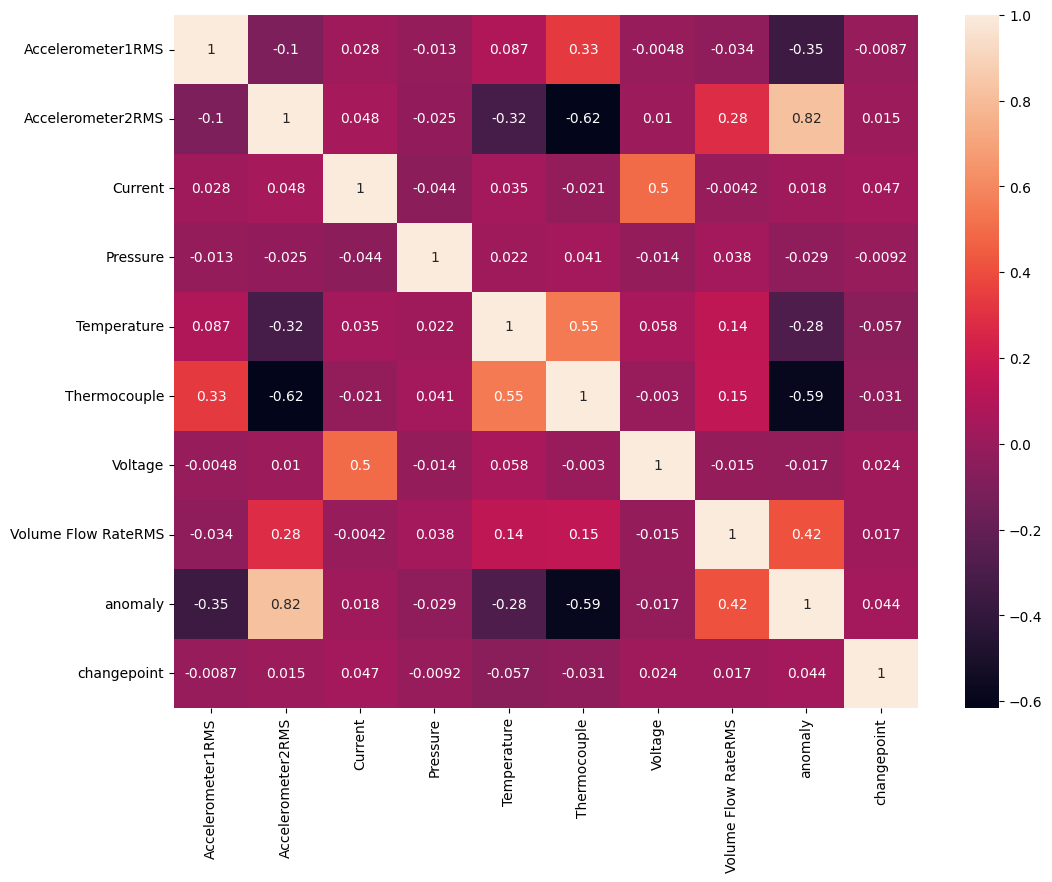

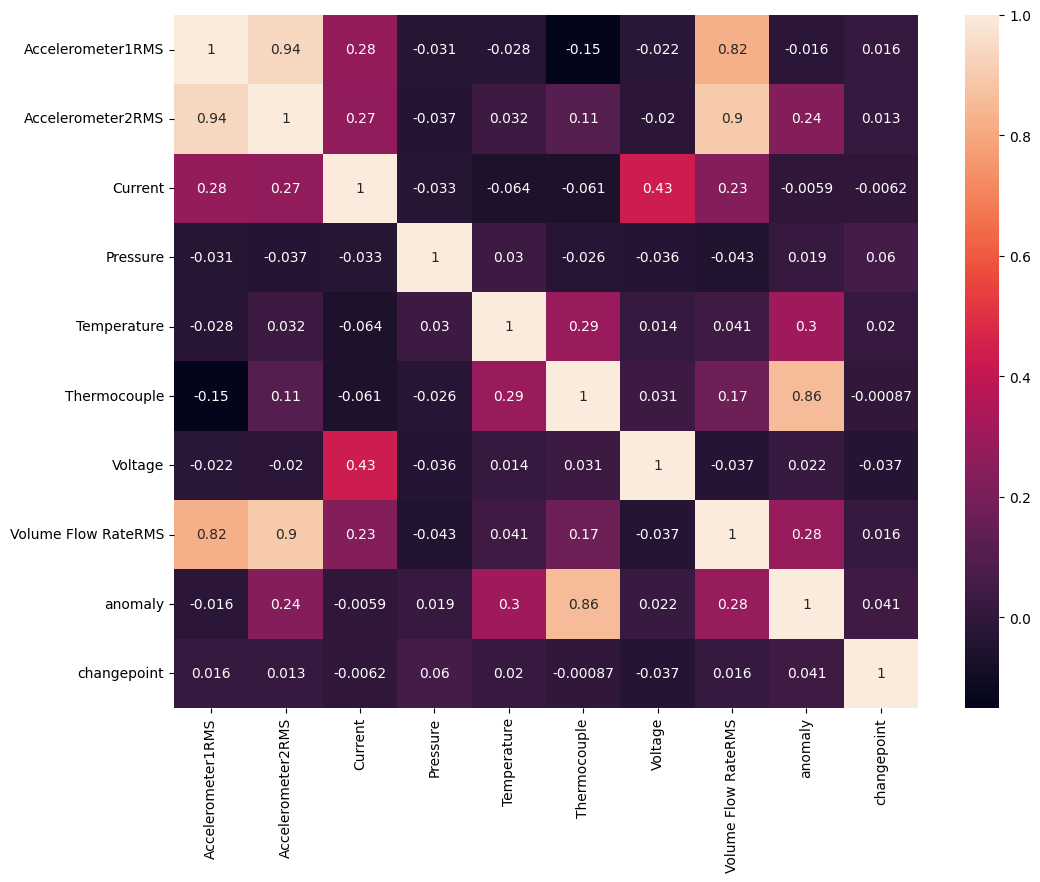

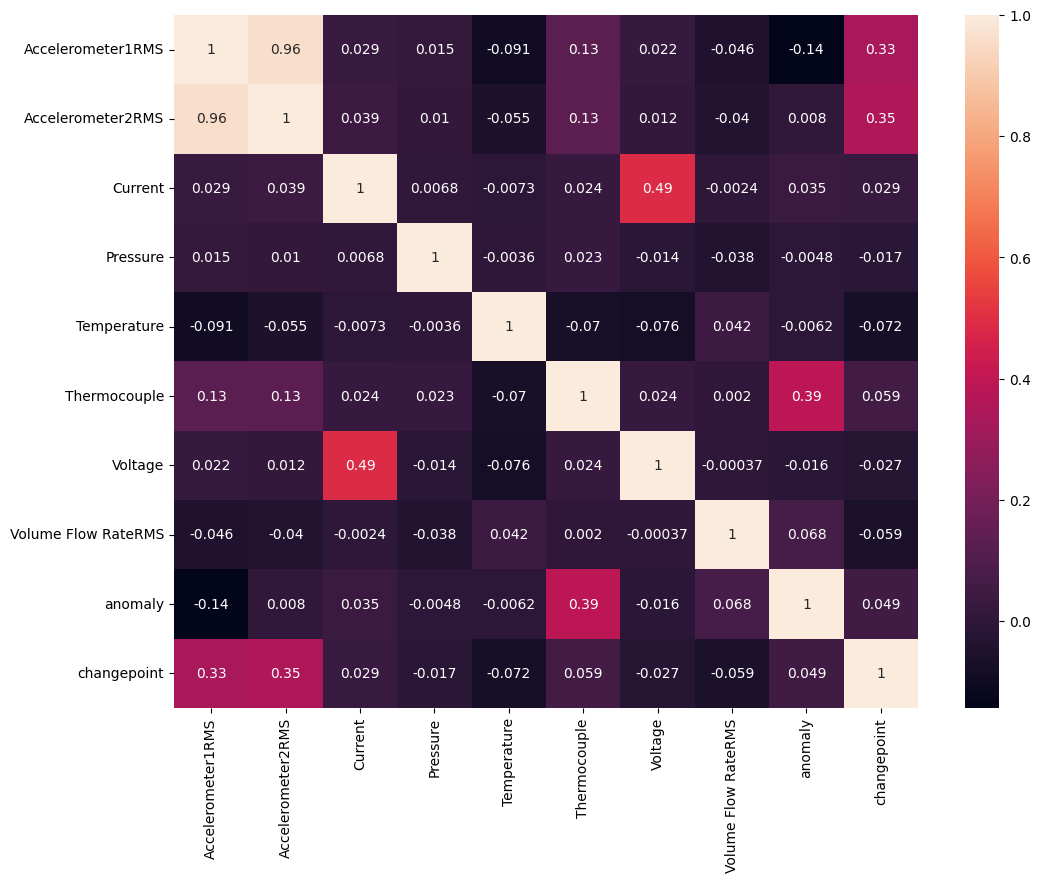

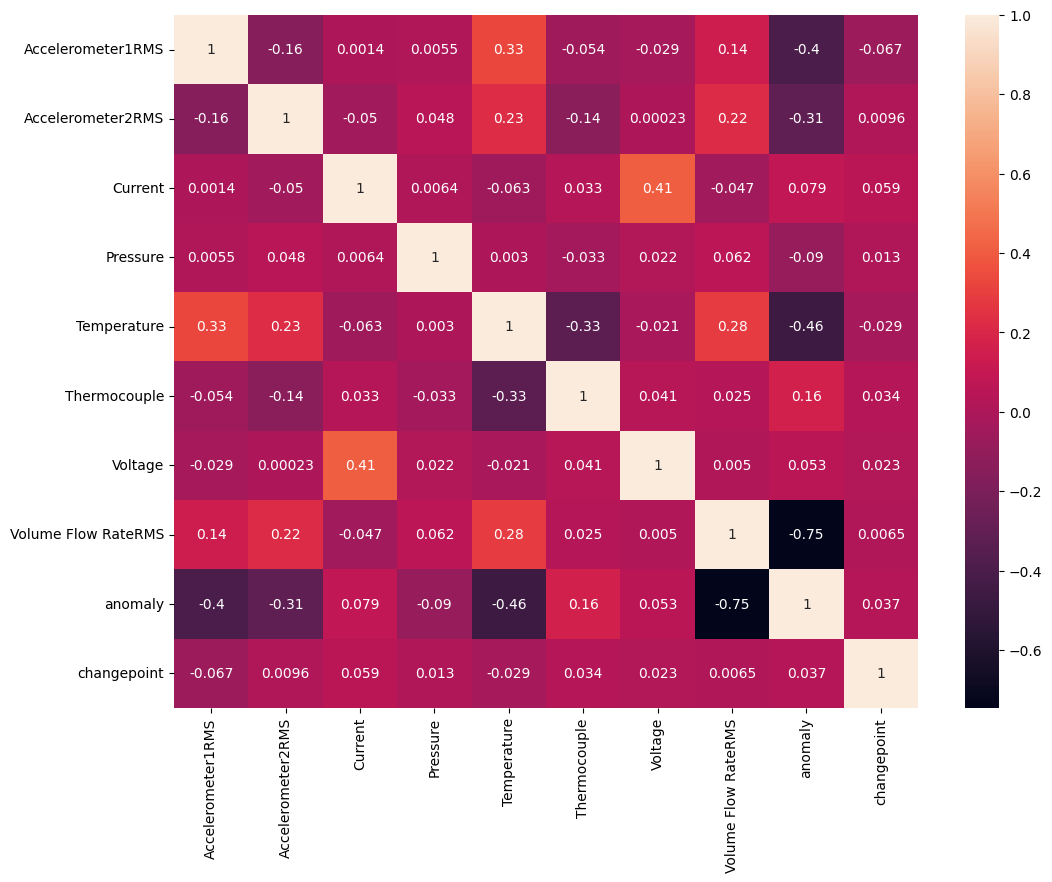

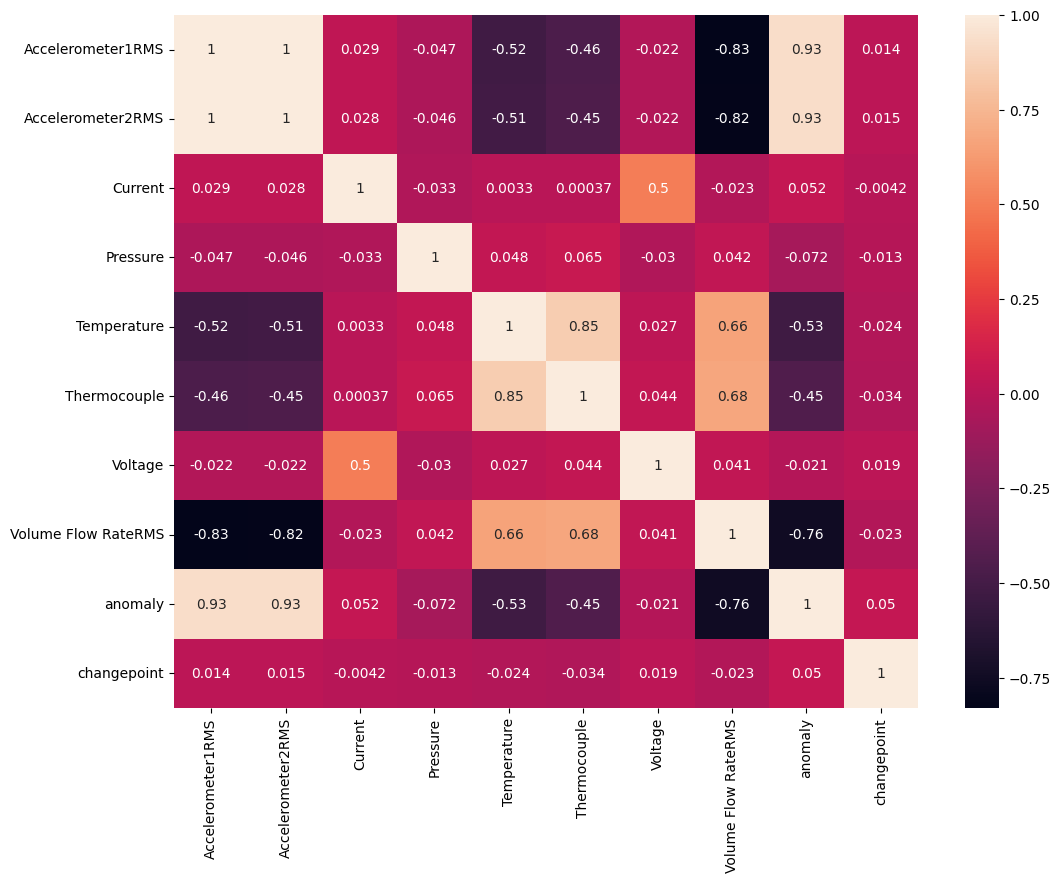

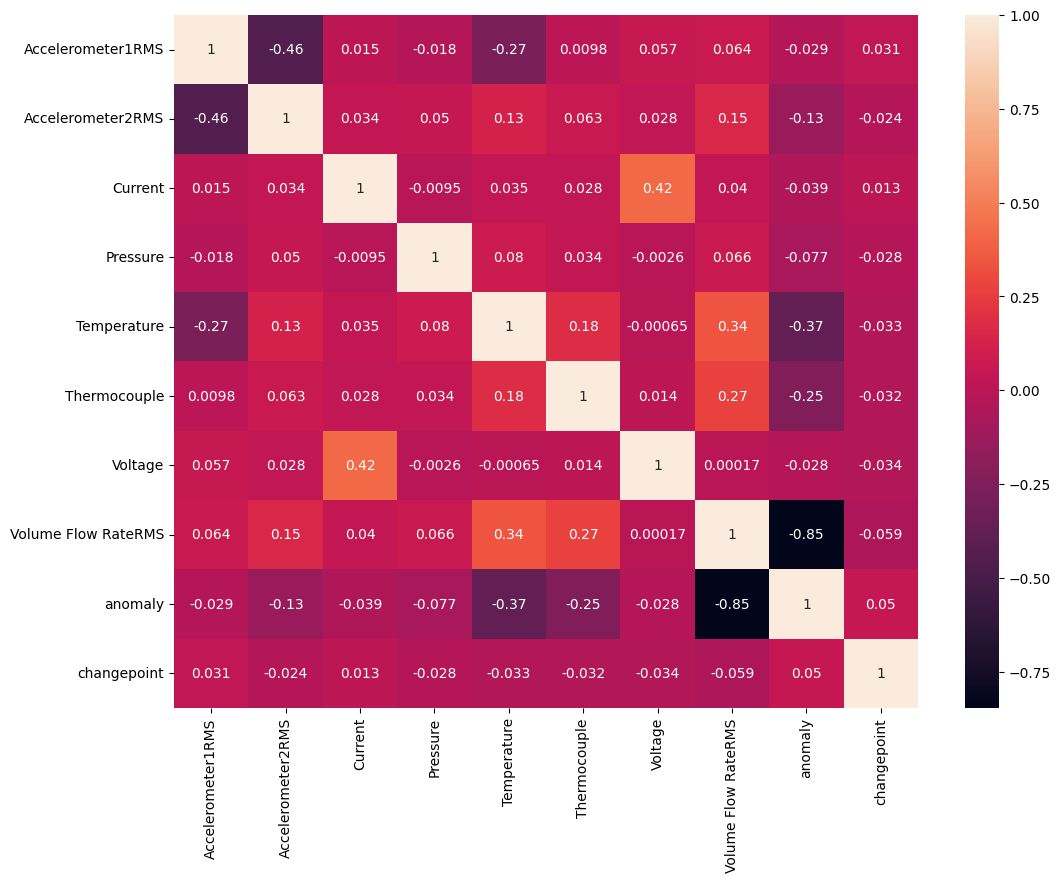

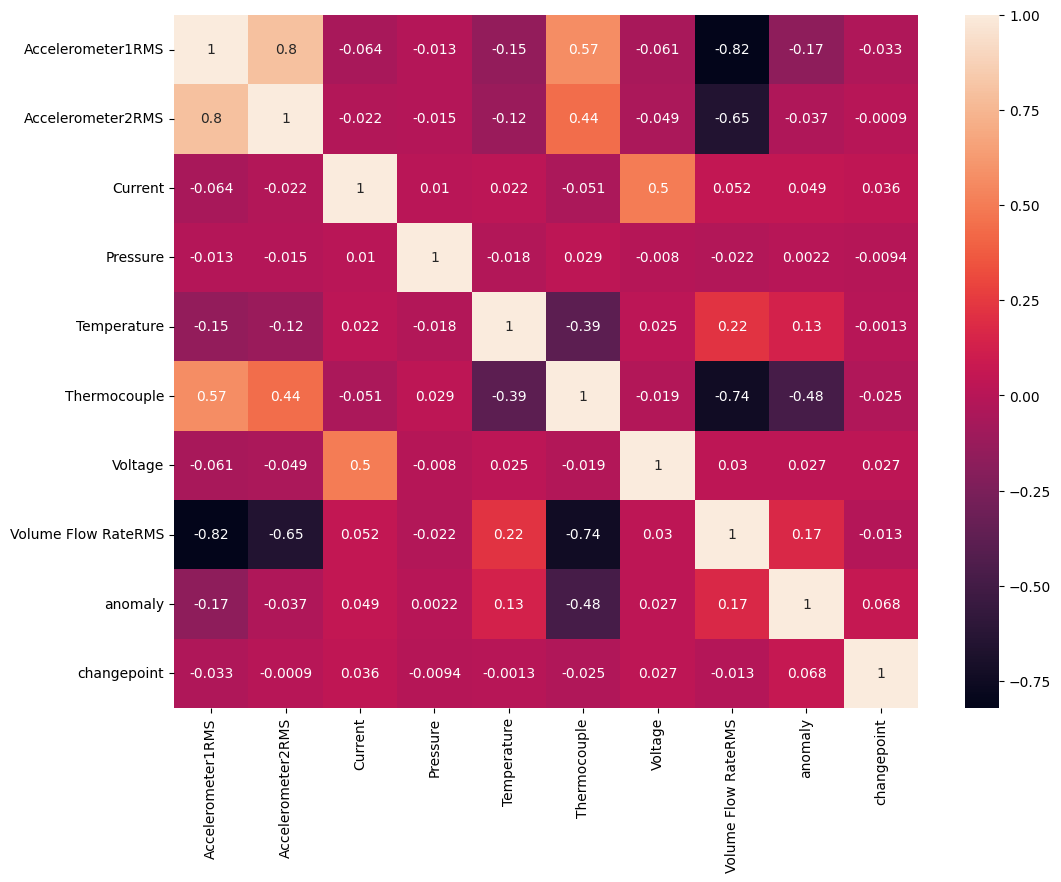

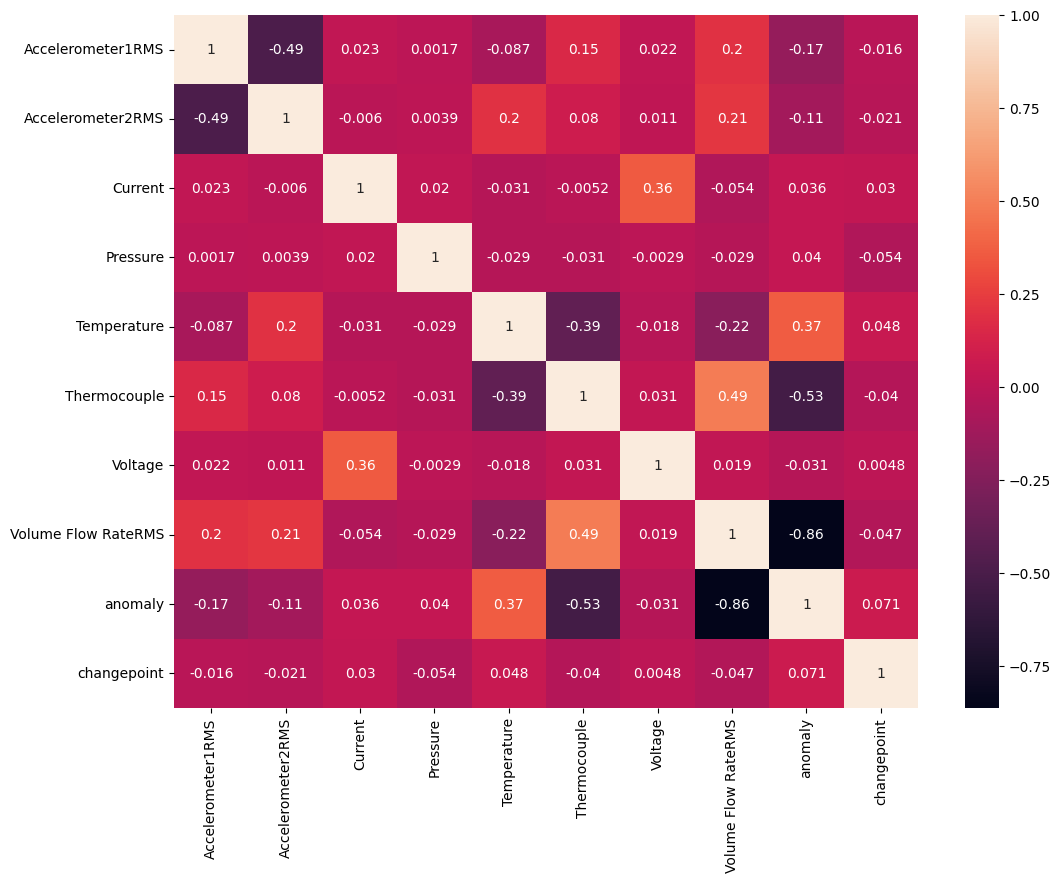

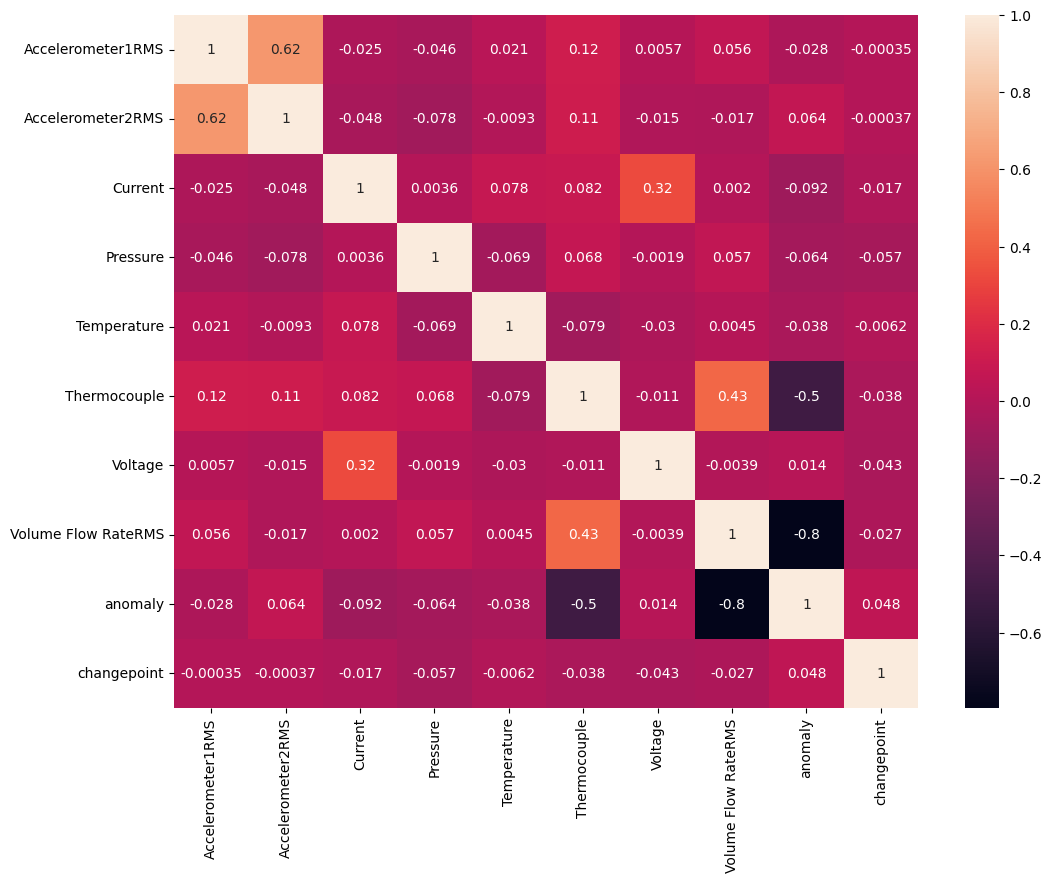

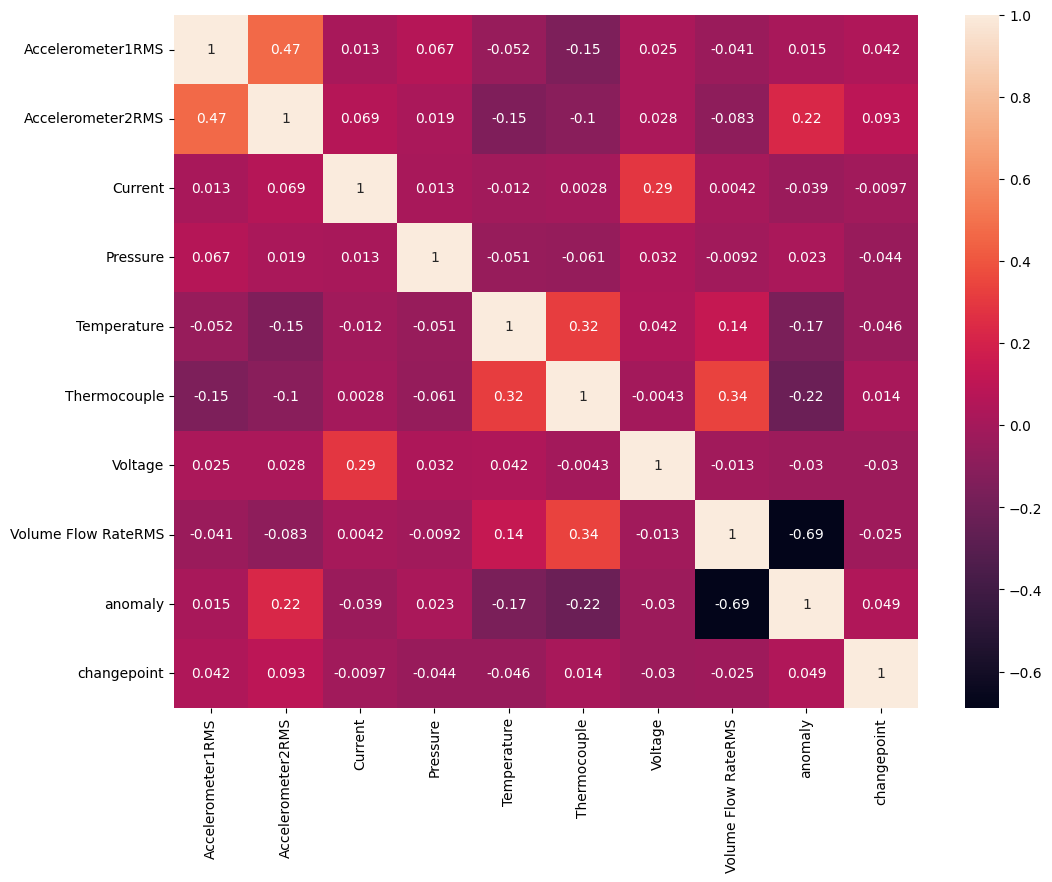

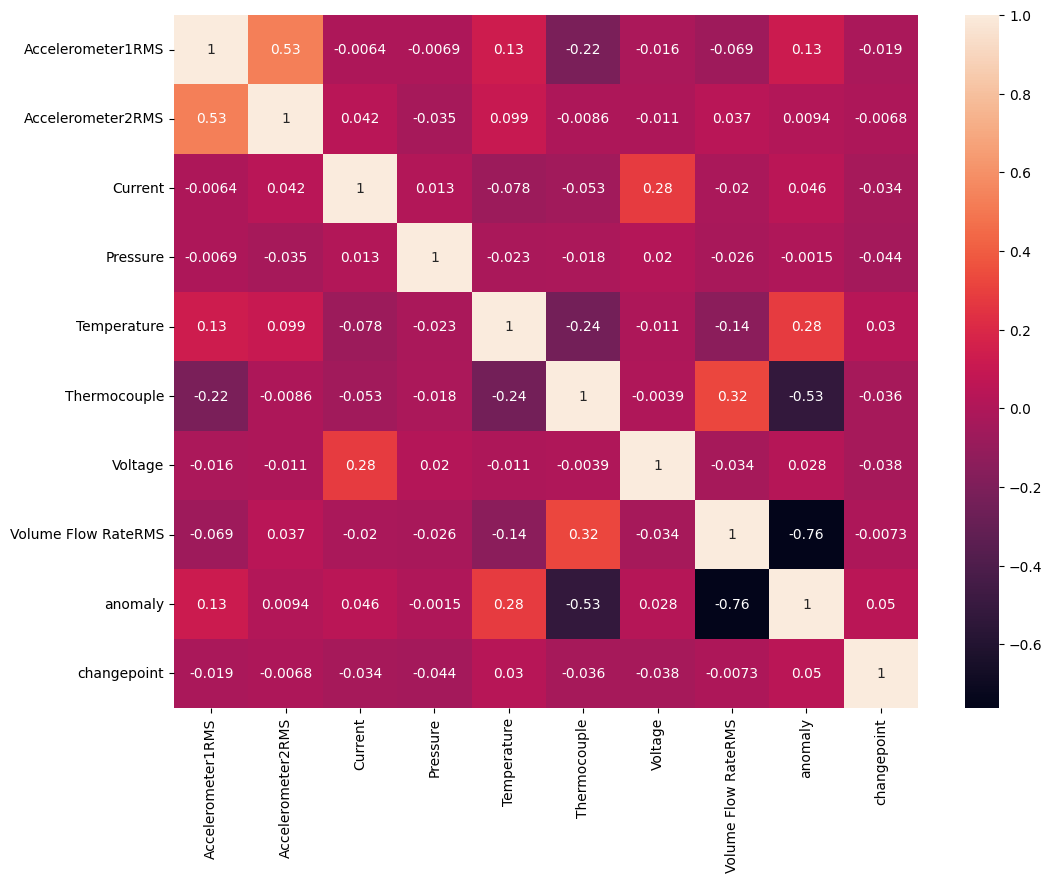

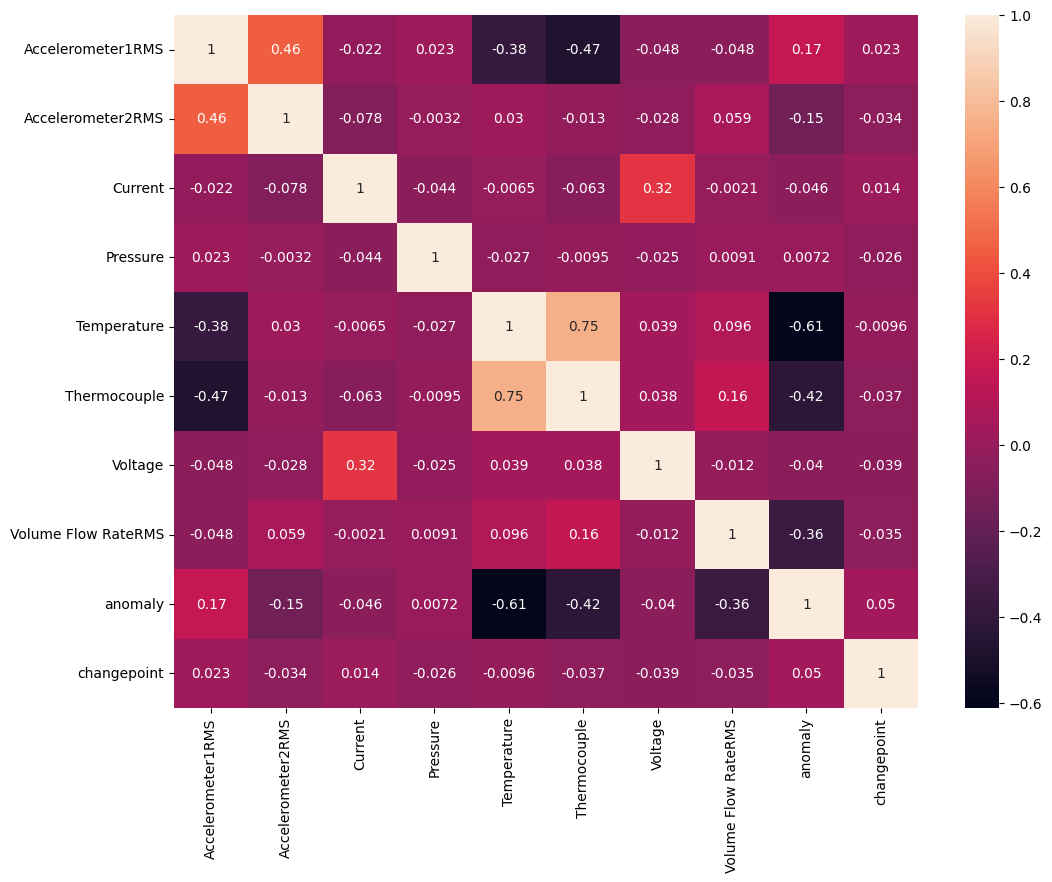

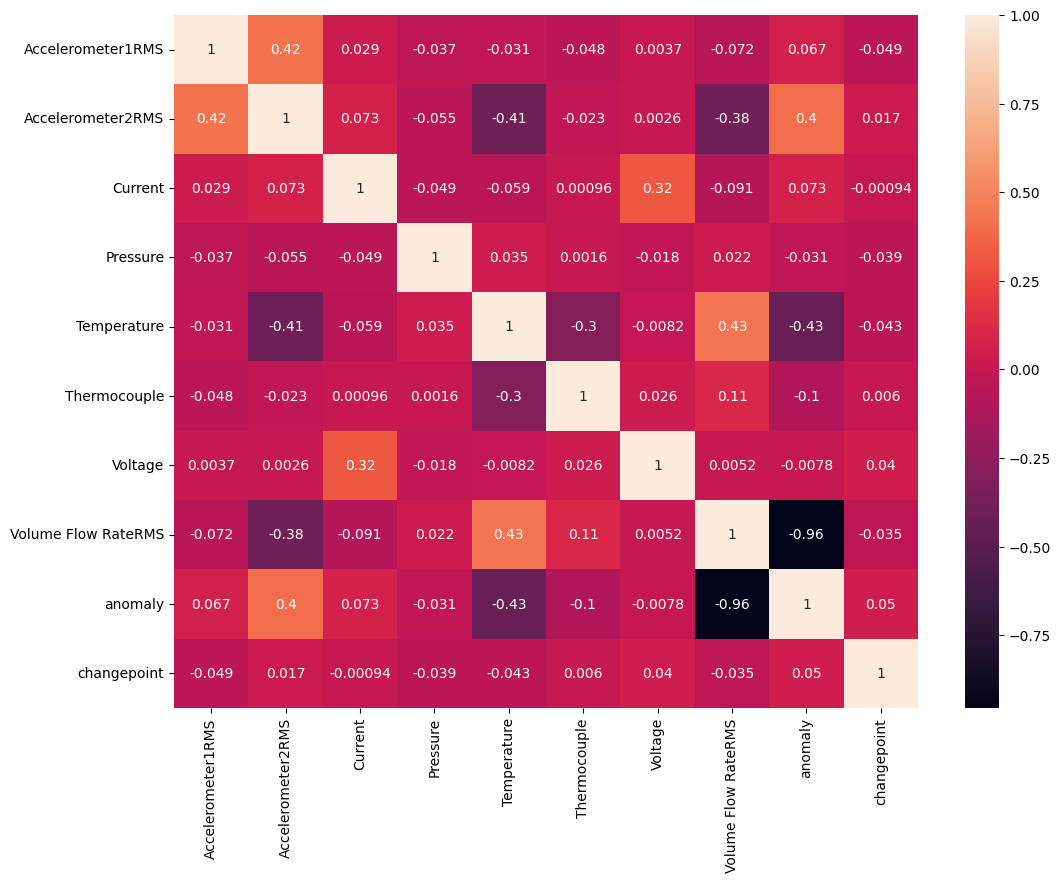

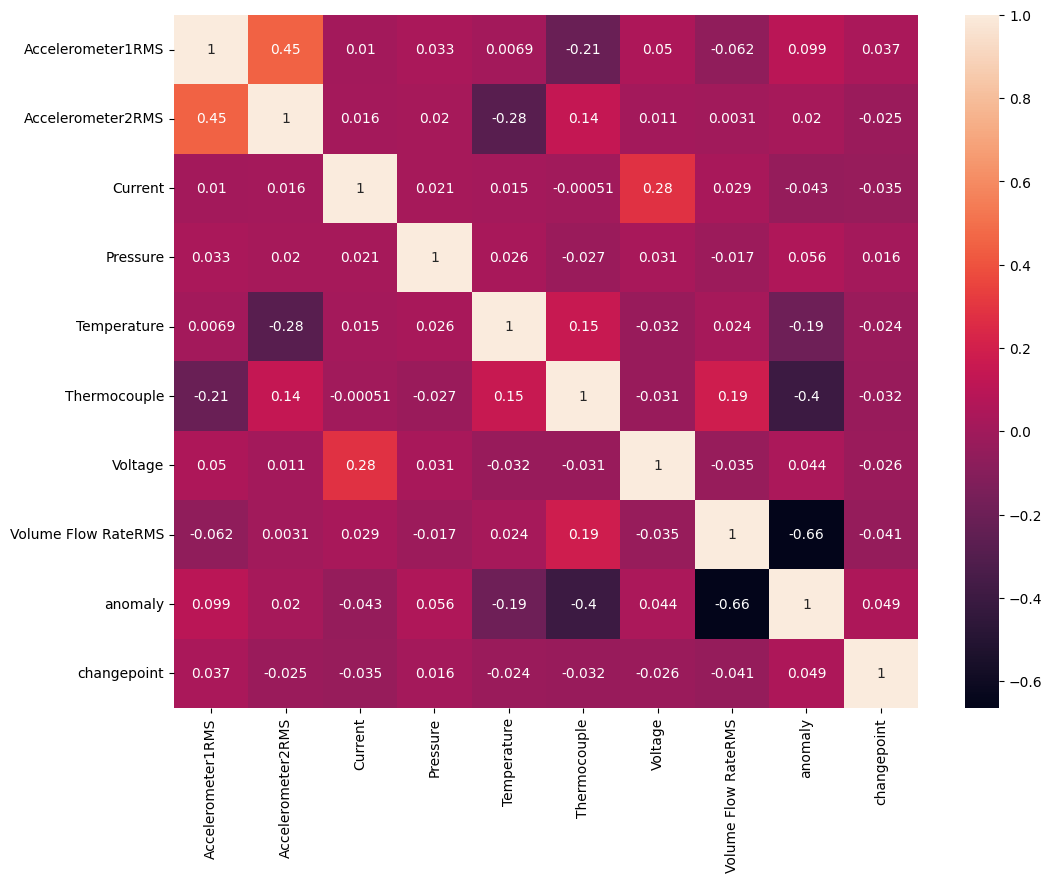

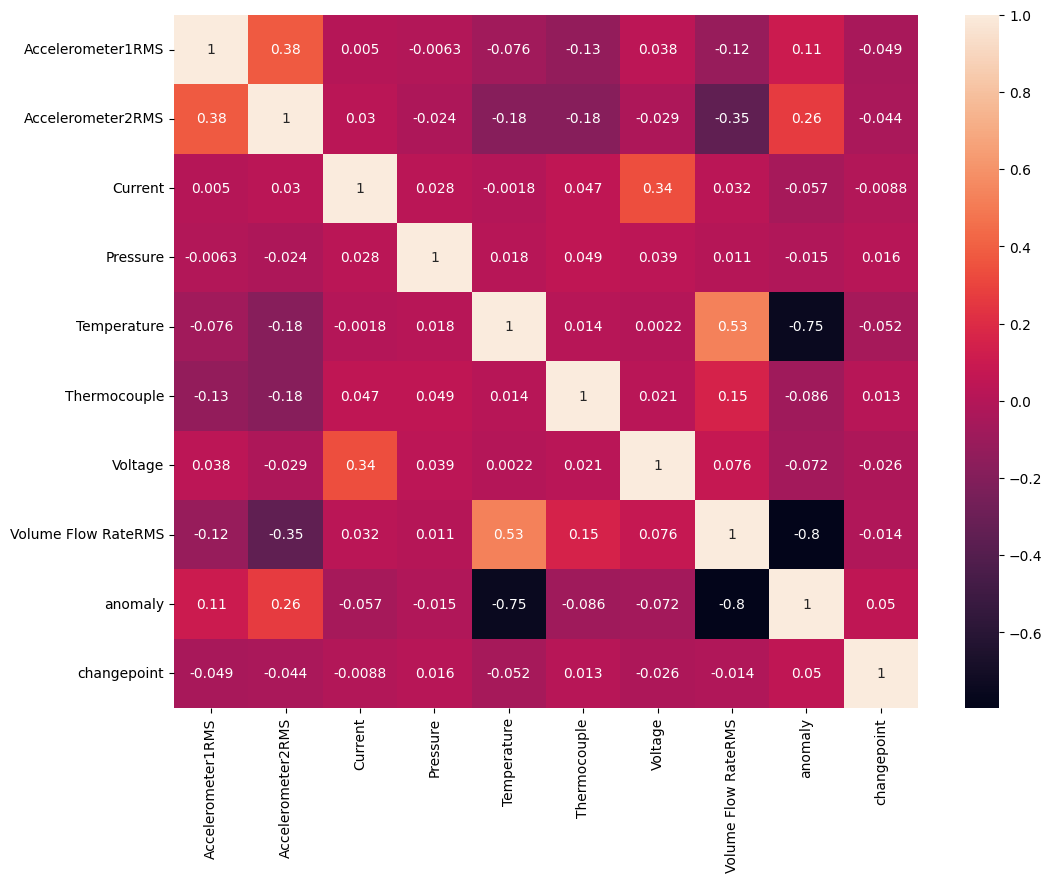

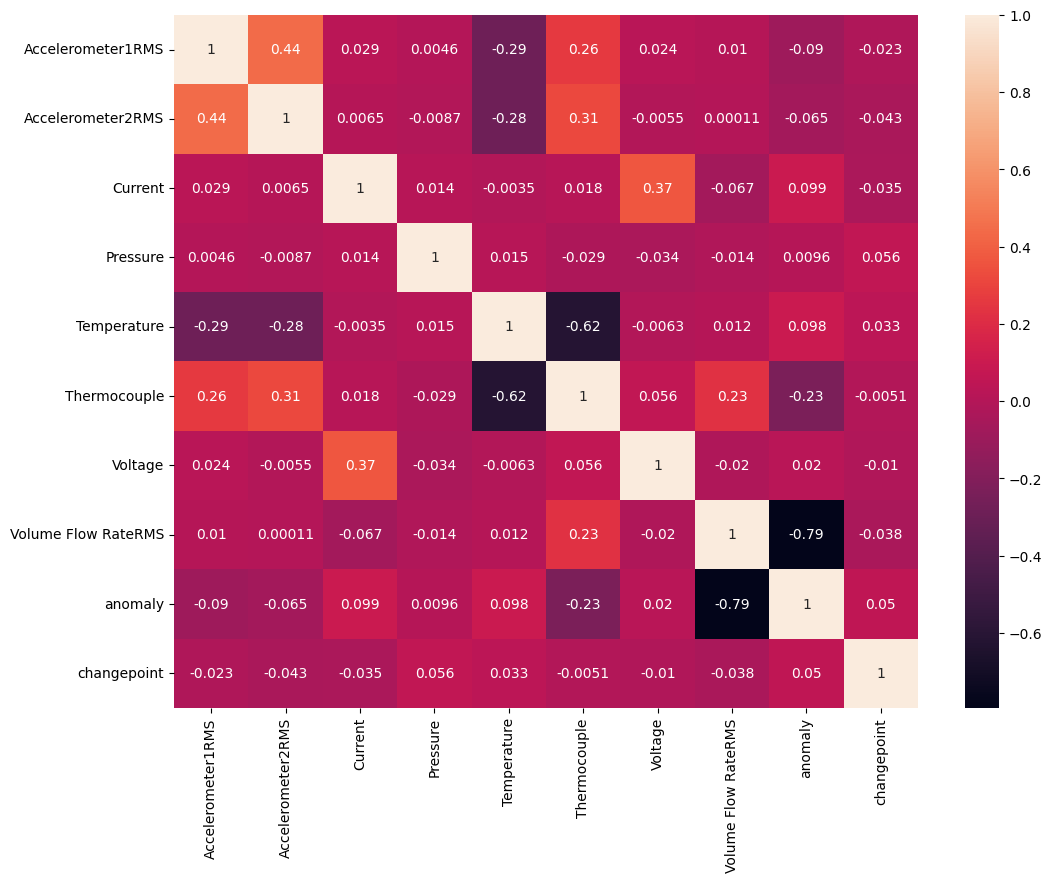

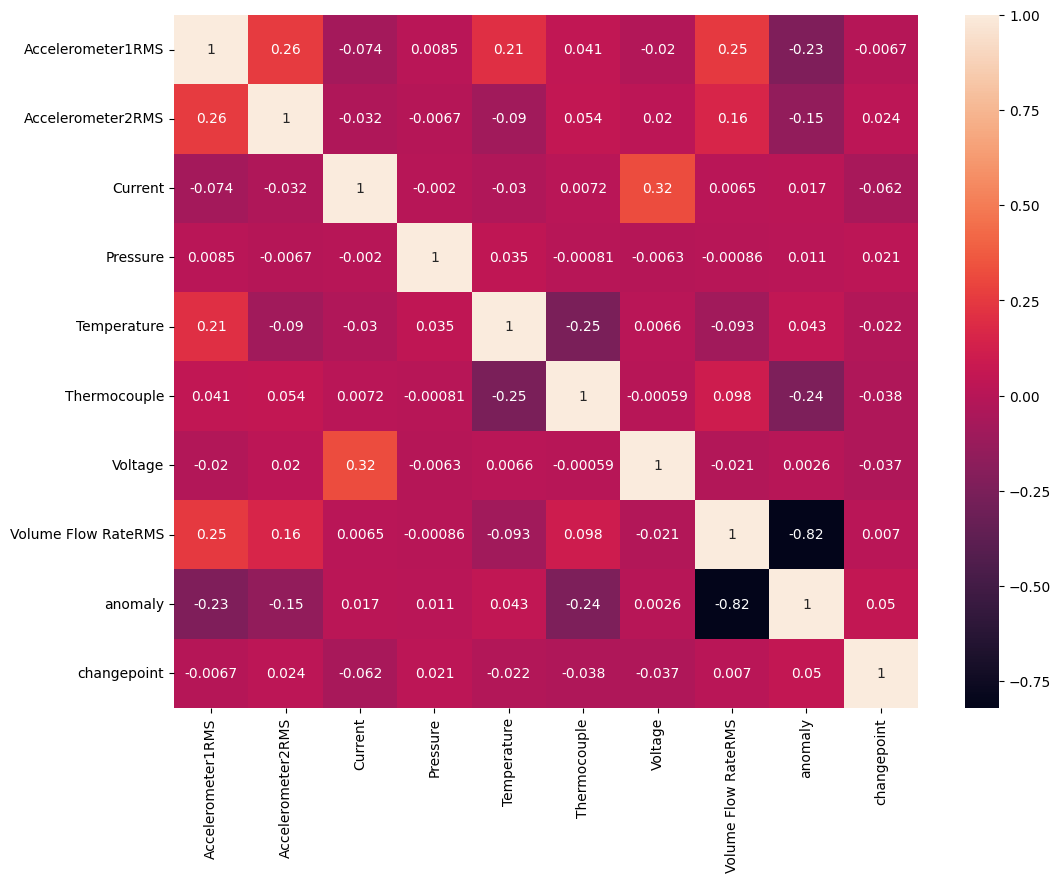

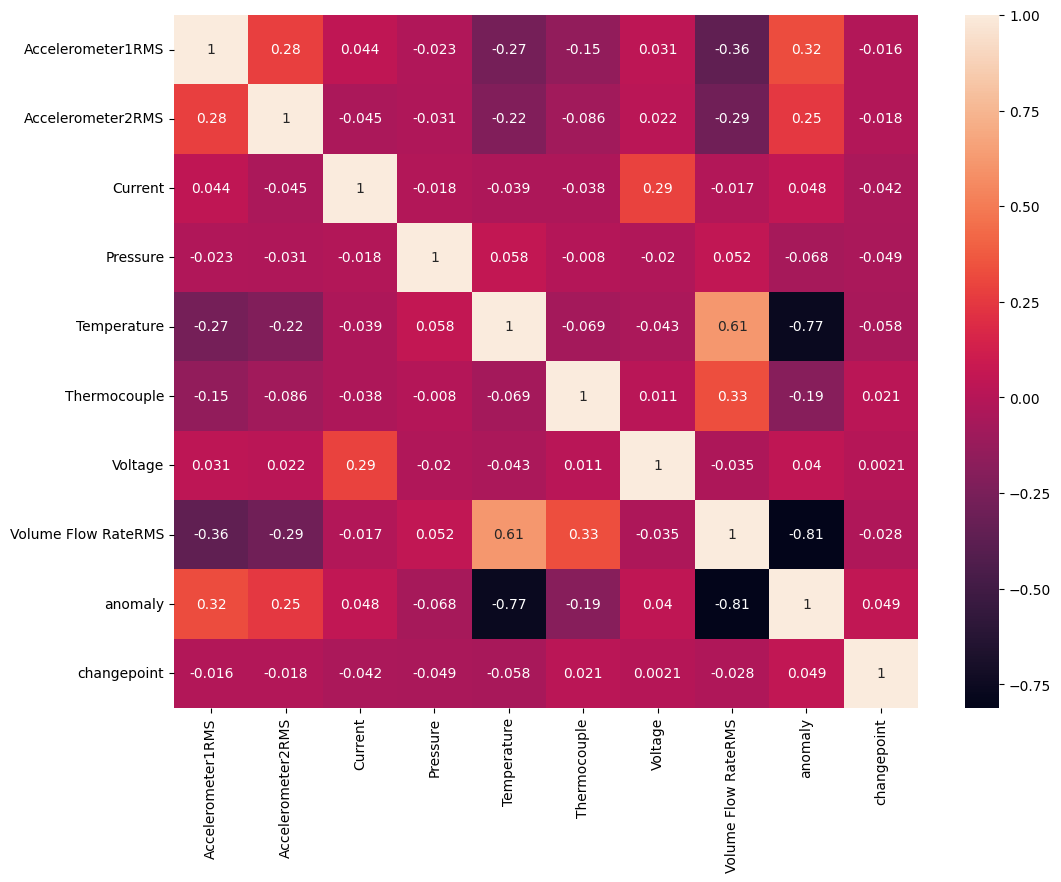

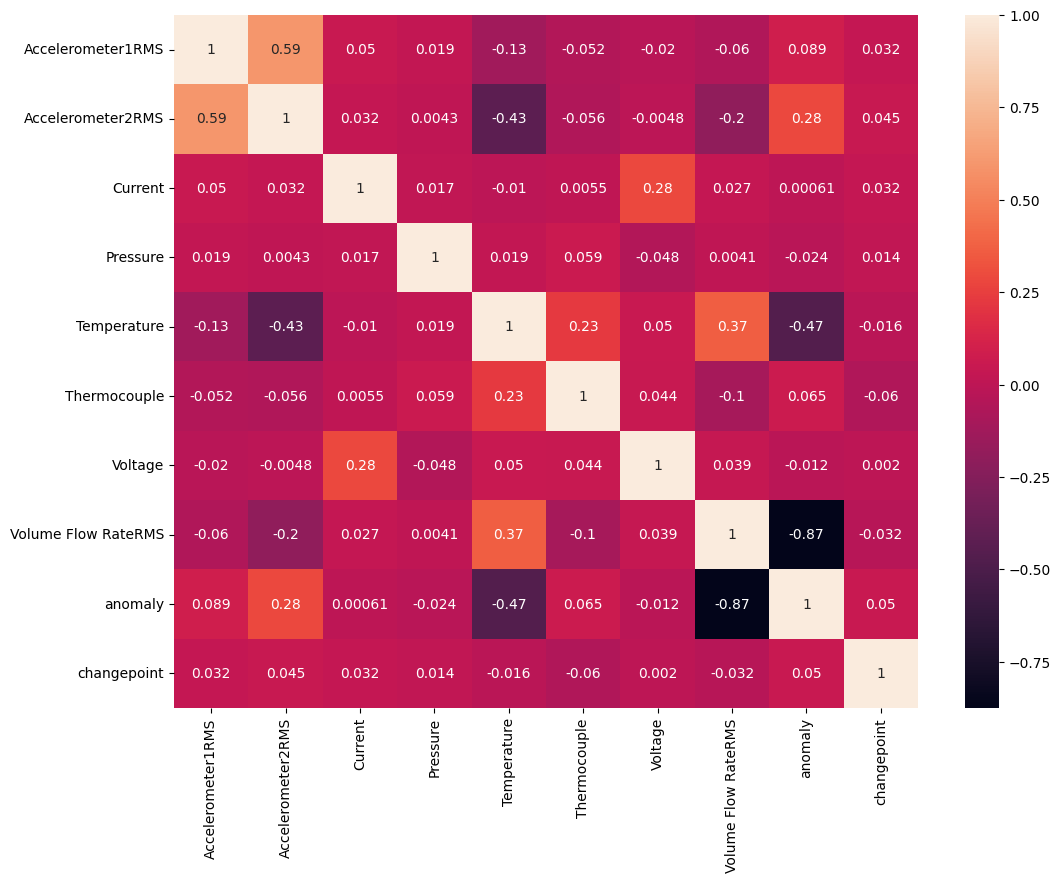

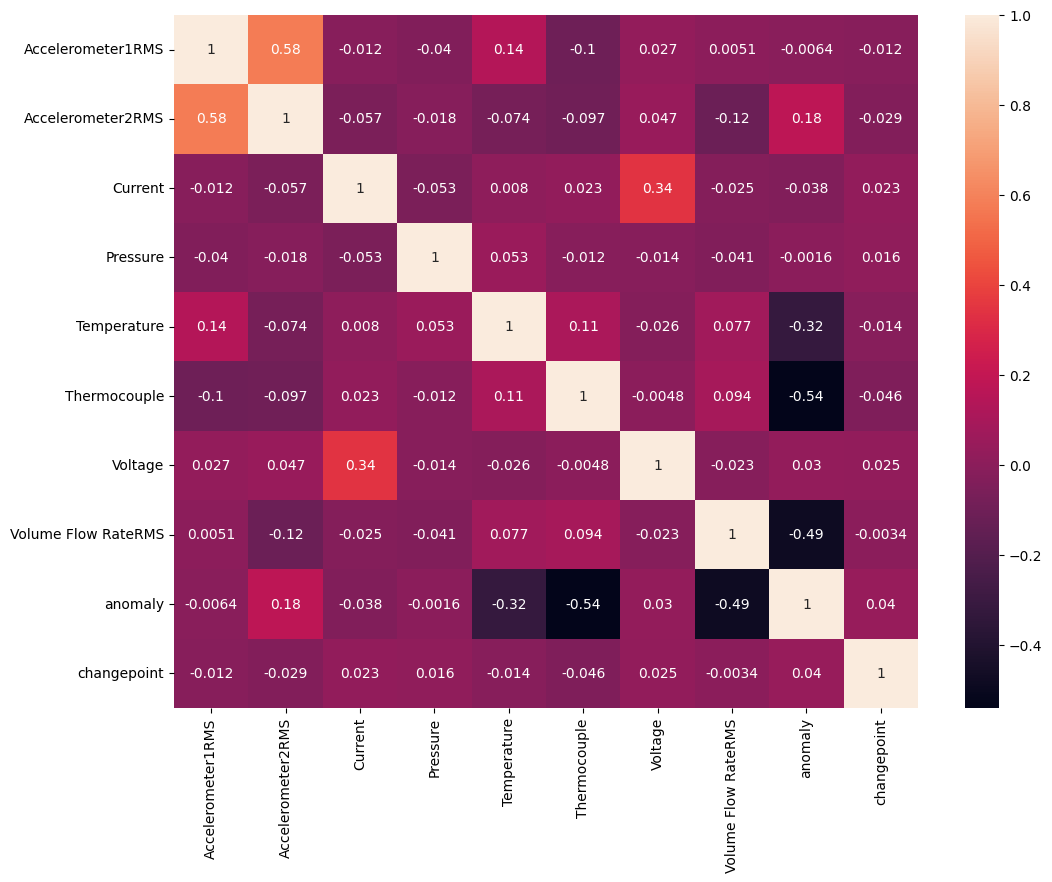

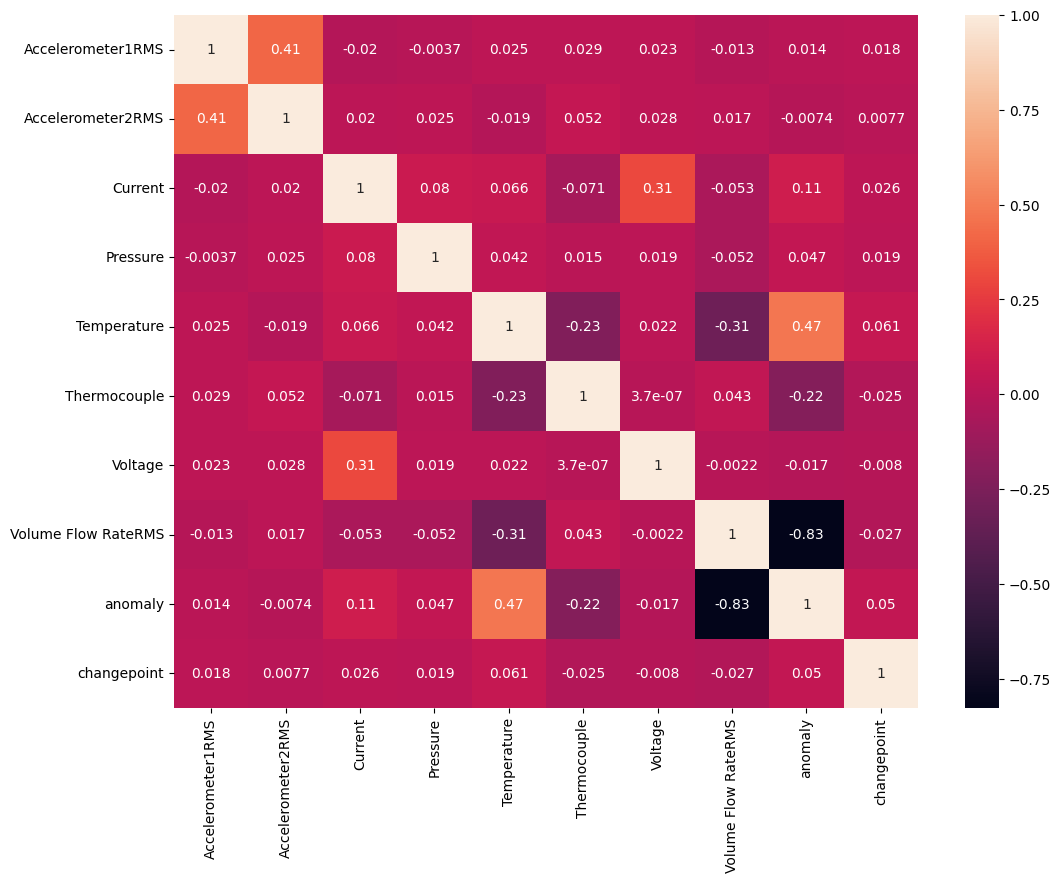

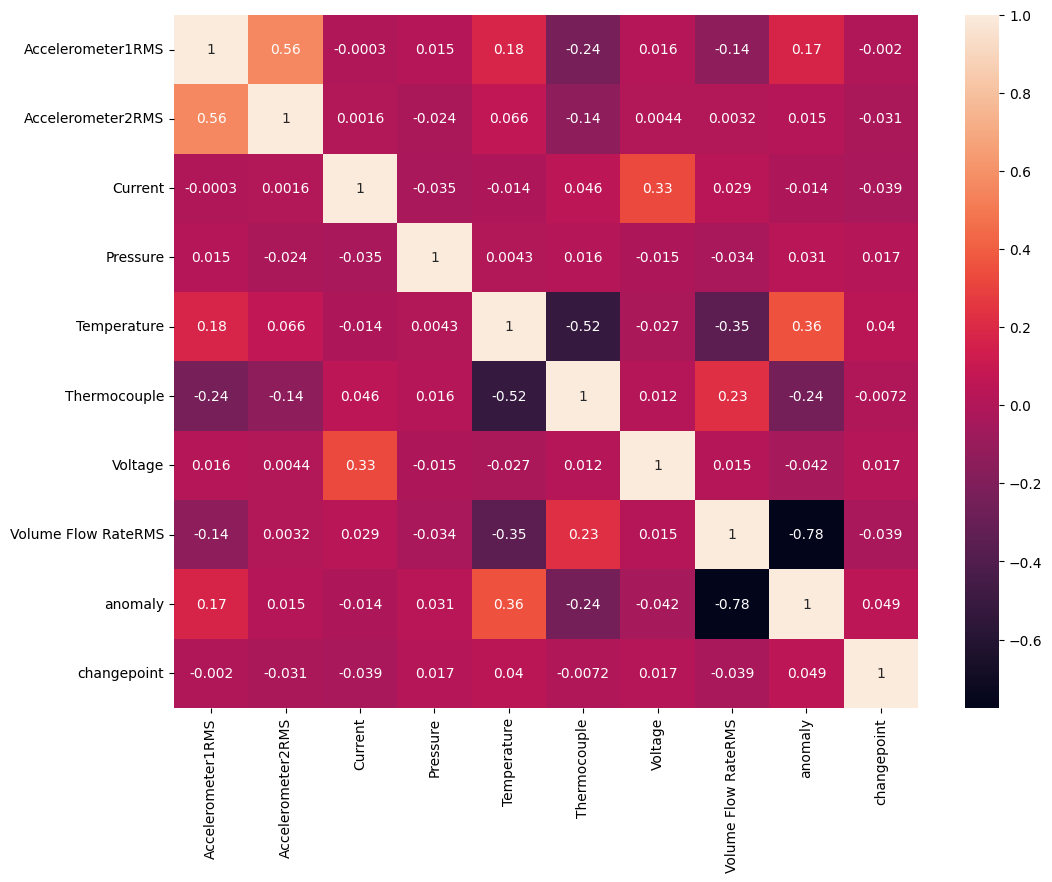

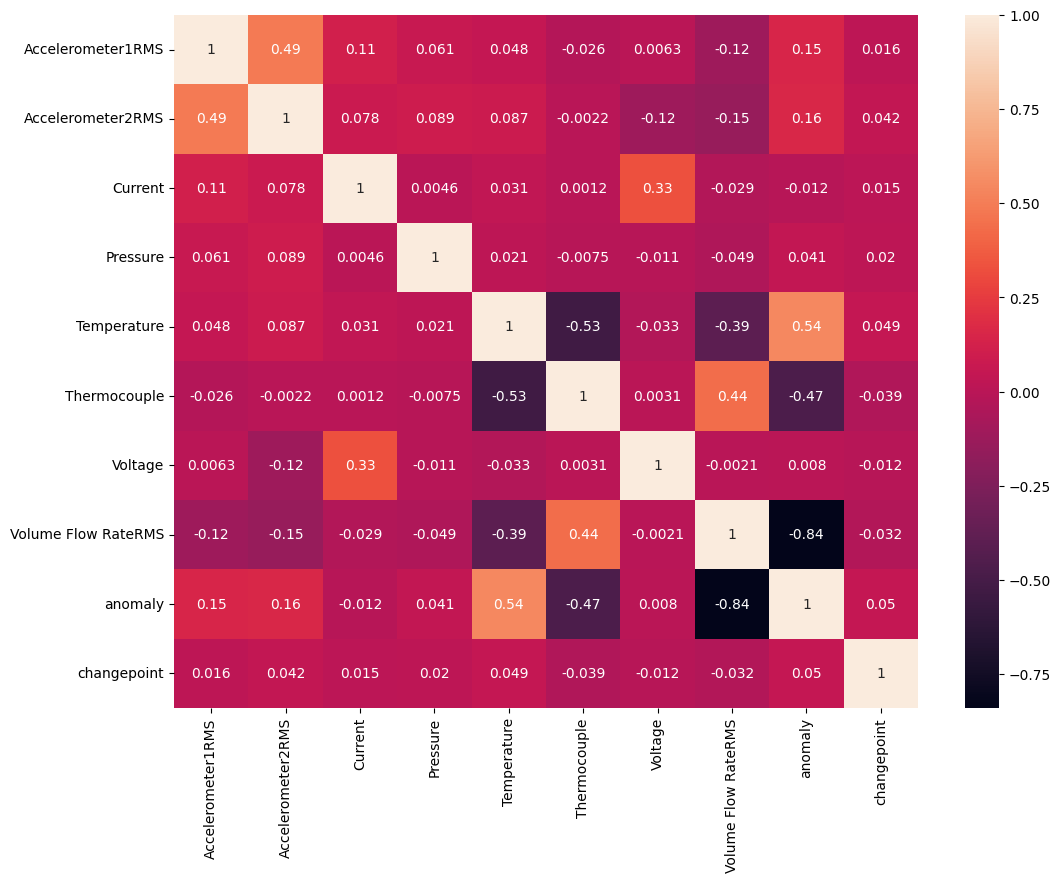

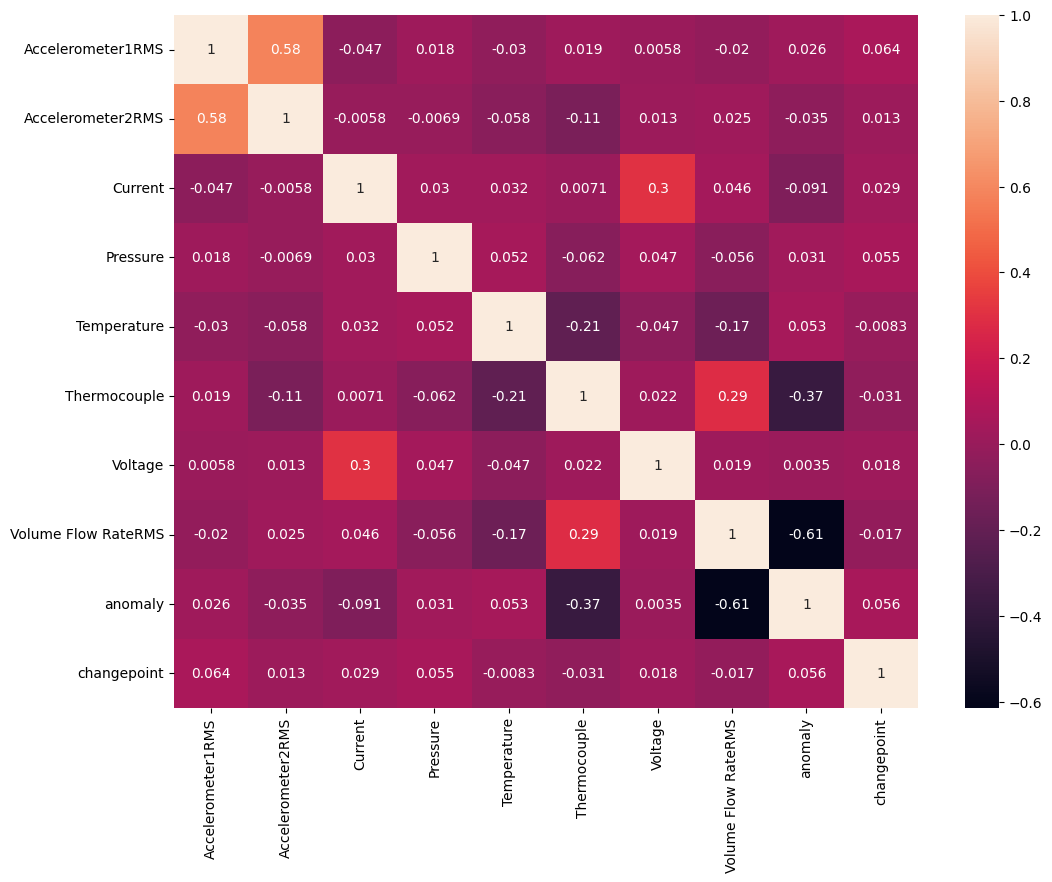

In [ ]:
#Correlation between variables
for df in list_of_df:
  plt.figure(figsize=(12,9))
  sns.heatmap(df.corr(),annot=True,fmt='.2g')

We will check the stationarity of time series.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# perform the extended Dickey-Fuller test

not_stationary = {}

for i in range(len(list_of_df)):
  result = []
  for c in list_of_df[i].columns:
    p_value = adfuller(list_of_df[i][c])[1]
    if p_value > 0.05:
      result.append(c)
  not_stationary.update({i:result})

In [ ]:
not_stationary

{0: ['Temperature', 'Thermocouple', 'Volume Flow RateRMS', 'anomaly'],
 1: ['Temperature', 'Thermocouple', 'Volume Flow RateRMS', 'anomaly'],
 2: ['Temperature', 'Thermocouple', 'Volume Flow RateRMS', 'anomaly'],
 3: ['Temperature', 'Thermocouple', 'Volume Flow RateRMS', 'anomaly'],
 4: ['Accelerometer1RMS',
  'Accelerometer2RMS',
  'Volume Flow RateRMS',
  'anomaly'],
 5: ['Accelerometer1RMS',
  'Accelerometer2RMS',
  'Temperature',
  'Thermocouple',
  'Volume Flow RateRMS',
  'anomaly'],
 6: ['Accelerometer1RMS', 'Accelerometer2RMS', 'Thermocouple', 'anomaly'],
 7: ['Accelerometer1RMS', 'Thermocouple', 'Volume Flow RateRMS', 'anomaly'],
 8: ['Accelerometer1RMS',
  'Accelerometer2RMS',
  'Volume Flow RateRMS',
  'anomaly'],
 9: ['Accelerometer1RMS',
  'Accelerometer2RMS',
  'Thermocouple',
  'Volume Flow RateRMS',
  'anomaly'],
 10: ['Accelerometer2RMS', 'Thermocouple', 'anomaly'],
 11: ['Accelerometer1RMS',
  'Accelerometer2RMS',
  'Thermocouple',
  'Volume Flow RateRMS',
  'anomaly'

In [ ]:
anomalies_structure = []
for df in list_of_df:
  anomaly_percentage = round (len(df[df.anomaly==1])/len(df)*100, 1)
  normal_percentage = 100 - anomaly_percentage
  anomalies_structure.append ([anomaly_percentage, normal_percentage])

In [ ]:
data_structure = pd.DataFrame(anomalies_structure, columns = ['anomaly', 'normal'])

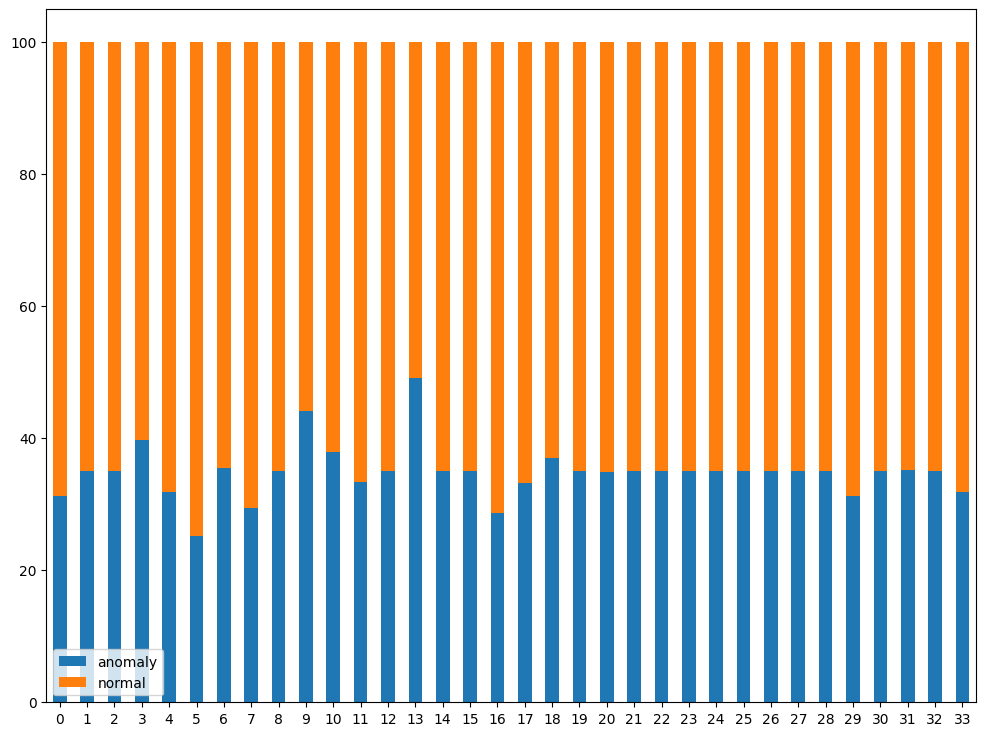

In [ ]:
# Plot the balance of class labels
data_structure.plot.bar(rot = 0, stacked = True, figsize = (12, 9)).legend(loc = 'lower left');